In [1]:
#Import libraries
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor,  RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

%config InlineBackend.figure_format = 'retina'
import pandas as pd




In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplo

In [3]:
# Data loading

#load excel file
path_data = Path("")
data = pd.ExcelFile(path_data/"DS Test Datasets.xlsx")

In [4]:
#Data description
sheet = data.sheet_names
sheet

['Time Series Problem', 'ML & EDA Problem']

# *****Probleme 2 : Exploratory Data Analysis*****

In [5]:
data = pd.read_excel(data, sheet[1])
data

,Y,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,9111,0.0,0.000000,0.343088,0.000000,100.4014,100.6104,0.04,0.551271,3.361059
1,10918,0.0,0.000000,0.343088,0.000000,100.5697,100.7629,0.04,0.551271,3.361059
2,13402,0.0,0.000000,0.343088,0.000000,100.7521,100.8958,0.04,0.551271,3.361059
3,11530,0.0,0.000000,0.357665,0.000000,100.9278,101.0110,0.04,0.556536,3.559978
4,9972,0.0,0.000000,0.357665,0.000000,101.0532,101.1080,0.04,0.556536,3.559978
...,...,...,...,...,...,...,...,...,...,...
142,9097,66.9,0.204189,0.120897,0.222077,101.7331,100.6104,0.03,0.698619,2.633420
143,9866,66.9,0.204189,0.120897,0.222077,101.7786,100.5691,0.03,0.698619,2.633420
144,?,67.0,0.212043,0.123172,0.216391,101.7656,100.4836,0.04,0.688172,2.394371
145,?,67.0,0.212043,0.123172,0.216391,101.6869,100.3605,0.04,0.688172,2.394371


In [6]:
#Check if data have missing values
data.count()

Y     147
V1    147
V2    147
V3    147
V4    147
V5    147
V6    147
V7    147
V8    147
V9    147
dtype: int64

**Shape of data**

In [7]:
data.shape

(147, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       147 non-null    object 
 1   V1      147 non-null    float64
 2   V2      147 non-null    float64
 3   V3      147 non-null    float64
 4   V4      147 non-null    float64
 5   V5      147 non-null    float64
 6   V6      147 non-null    float64
 7   V7      147 non-null    float64
 8   V8      147 non-null    float64
 9   V9      147 non-null    float64
dtypes: float64(9), object(1)
memory usage: 11.6+ KB


***All the features are discretes***

In [9]:
#Unique values of Y to see types of variable
unique_y_val = data.Y.unique()
unique_y_val

array([9111, 10918, 13402, 11530, 9972, 11552, 9582, 10649, 14917, 13133,
       15515, 10633, 10051, 11370, 16093, 10821, 12761, 12767, 11941,
       11074, 14482, 13937, 17892, 13277, 12784, 12672, 15354, 10697,
       10955, 11587, 13468, 11423, 16002, 10483, 10915, 10373, 8709, 6951,
       11068, 7989, 6933, 10208, 10738, 8268, 10873, 10204, 10685, 9941,
       8499, 10193, 12953, 8597, 9923, 10948, 9632, 9344, 13749, 11673,
       12147, 11821, 10891, 11272, 13568, 9446, 9102, 11919, 11065, 8705,
       14487, 12550, 11769, 12037, 10742, 8052, 12500, 8613, 9185, 12591,
       10642, 8772, 8521, 13022, 10247, 9817, 10102, 7777, 9262, 7907,
       6565, 7682, 7621, 7005, 9709, 10860, 8246, 8977, 7886, 7509, 8374,
       8405, 6955, 7589, 128, 270, 605, 3170, 2510, 3492, 3417, 3491,
       5954, 6673, 5802, 9174, 12250, 9098, 10675, 12416, 9673, 10833,
       7328, 7584, 11266, 14048, 7491, 8740, 12687, 5957, 8590, 12302,
       8121, 8932, 9901, 11677, 7198, 6497, 9086, 8671, 6194,

In [10]:
#Let see the values that are non numeriques
i=0
for val in data.values:
    if not str(val[0]).isdigit():
        print(f' columns {i} : {val[:-1]}')
        print()
    i +=1

 columns 144 : ['?' 67.0 0.212043 0.123172 0.216391 101.7656 100.4836 0.04 0.688172]

 columns 145 : ['?' 67.0 0.212043 0.123172 0.216391 101.6869 100.3605 0.04 0.688172]

 columns 146 : ['?' 67.0 0.212043 0.123172 0.216391 101.5832 100.2126 0.04 0.688172]



In [11]:
#only the thirst last columns Y have non numerics values 
#Let us observe the characteristic measurements of the Y target
np_y = np.array(data["Y"].to_list()[:-3], dtype='float64')
print(f"minimum \t \t: {min(np_y):.7}")
print(f"minimum \t \t: {max(np_y):.7}")
print(f"mean \t \t \t: {np_y.mean():.7}")
print(f"Standard deviation \t: {np_y.std():.7}")


minimum 	 	: 128.0
minimum 	 	: 17892.0
mean 	 	 	: 9872.597
Standard deviation 	: 2984.729


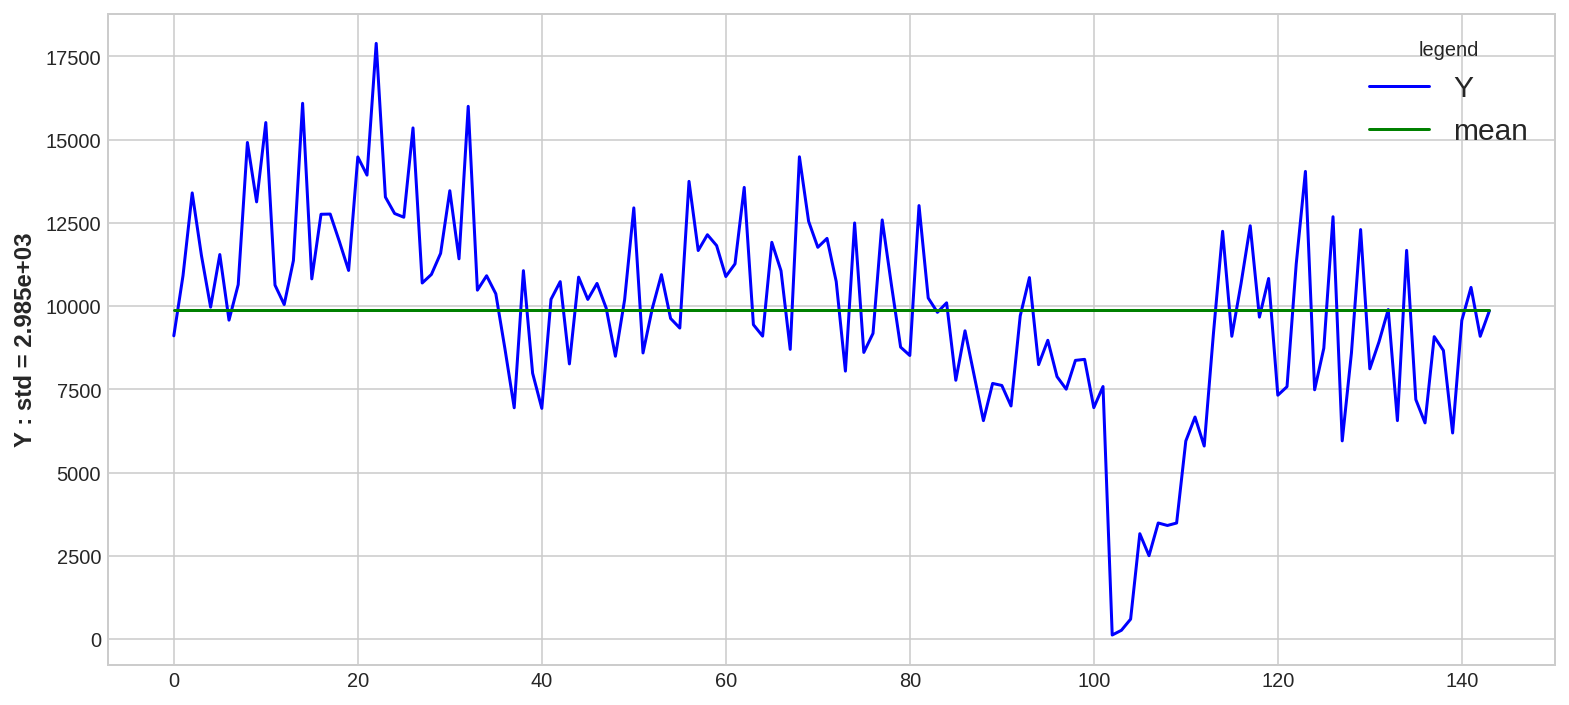

In [12]:
#graphics of the Y column and its mean
fig, ax = plt.subplots()
ax.plot(np_y, label="Y", color="blue")
ax.plot(np.ones(len(np_y))*np_y.mean(), label="mean", color="green")
ax.set_ylabel("Y"+f' : std = {np_y.std():.4}')
ax.legend(['Y',"mean"], title="legend", prop={"size":15})


Text(0, 0.5, 'new_Y')

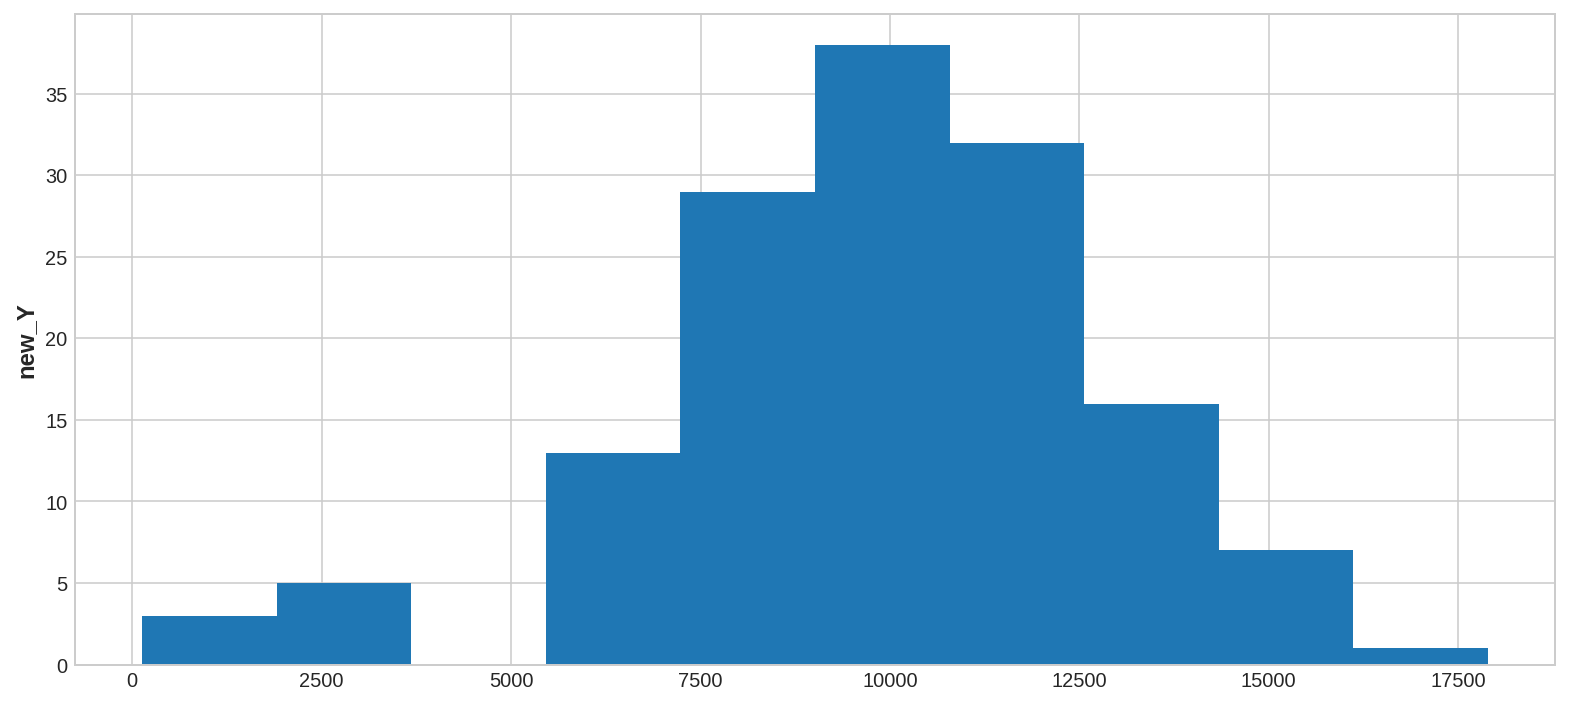

In [13]:
#Let's observe histogramme
fig, ax = plt.subplots()
ax.hist(np_y)
ax.set_ylabel("new_Y")

Text(0, 0.5, 'new_Y : cummulative histogram')

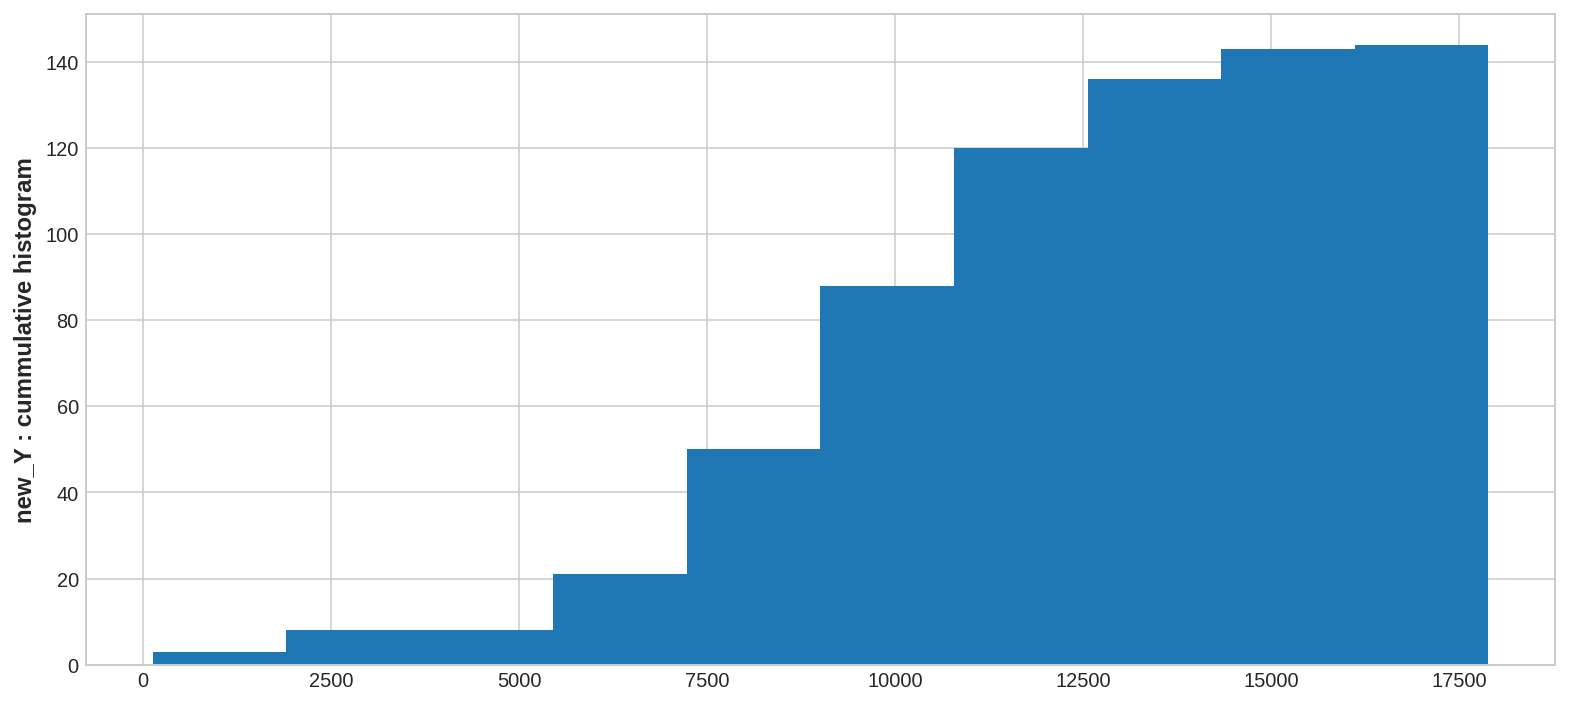

In [14]:
#Let's observe cumulative histogramme
fig, ax = plt.subplots()
ax.hist(np_y, cumulative=True)
ax.set_ylabel("new_Y : cummulative histogram")

In [15]:
#Let's create one another column wich contain Y values columns, and mean on the thirst last 
new_y = np.array(list(np_y)+[np_y.mean()]*3)
data["new_Y"] = new_y

In [16]:
#summary of data
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,new_Y
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,39.097959,0.094000,0.267855,0.079813,100.159698,100.162936,0.029796,0.612935,1.258732,9872.597222
std,26.294016,0.088391,0.071908,0.072812,1.208930,1.279667,0.028561,0.038636,2.105637,2964.215095
min,0.000000,0.000000,0.120897,0.000000,96.322000,96.105030,-0.060000,0.551271,-5.418855,128.000000
25%,0.000000,0.016021,0.215241,0.014934,99.746955,99.791965,0.020000,0.588303,0.513228,8389.500000
50%,53.500000,0.045192,0.291732,0.060377,100.344900,100.287500,0.040000,0.599283,1.954168,9972.000000
75%,57.600000,0.177240,0.325331,0.135428,101.032200,100.942100,0.050000,0.641179,2.476705,11630.000000
max,67.000000,0.264827,0.358630,0.235520,101.778600,102.174800,0.090000,0.698619,3.559978,17892.000000


***gaphics of features and their mean***

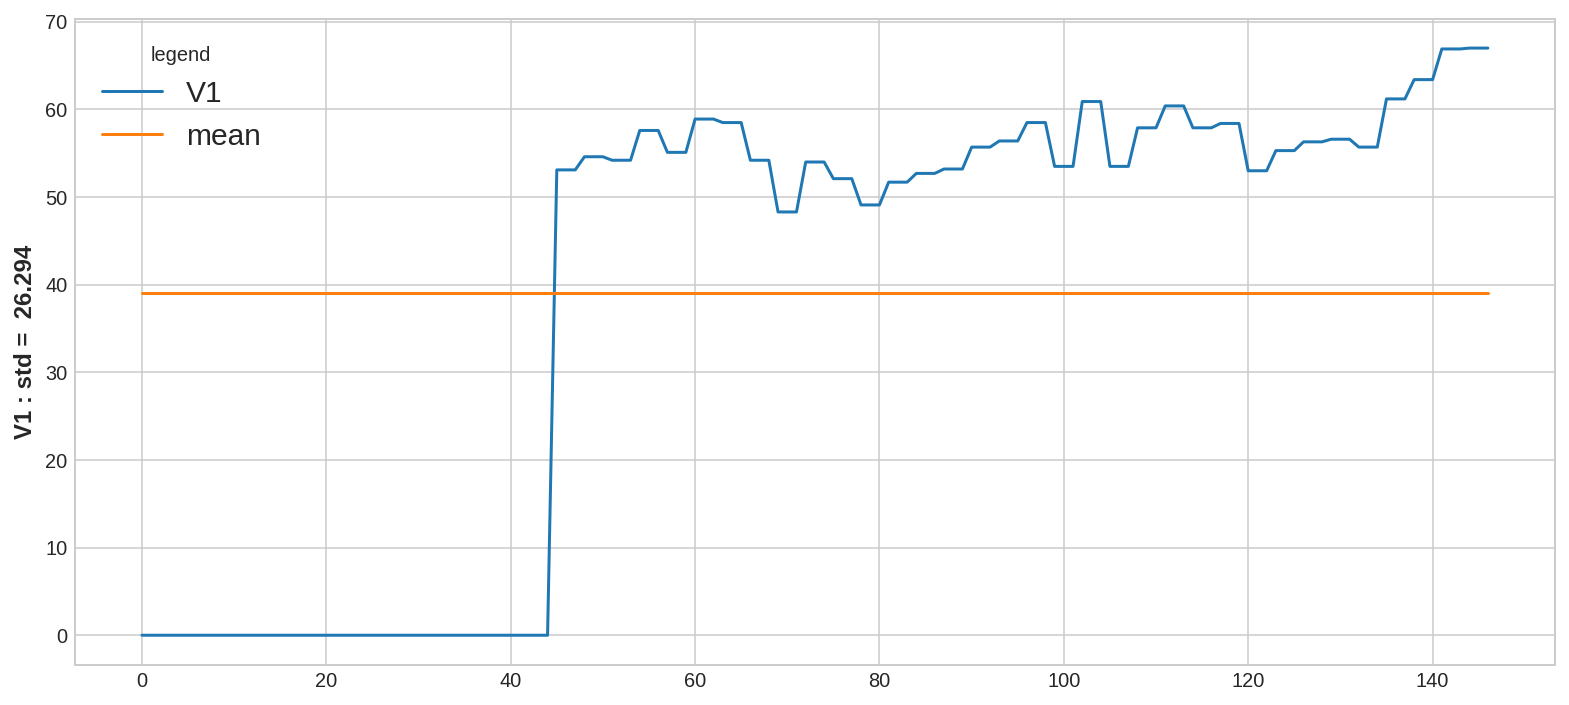

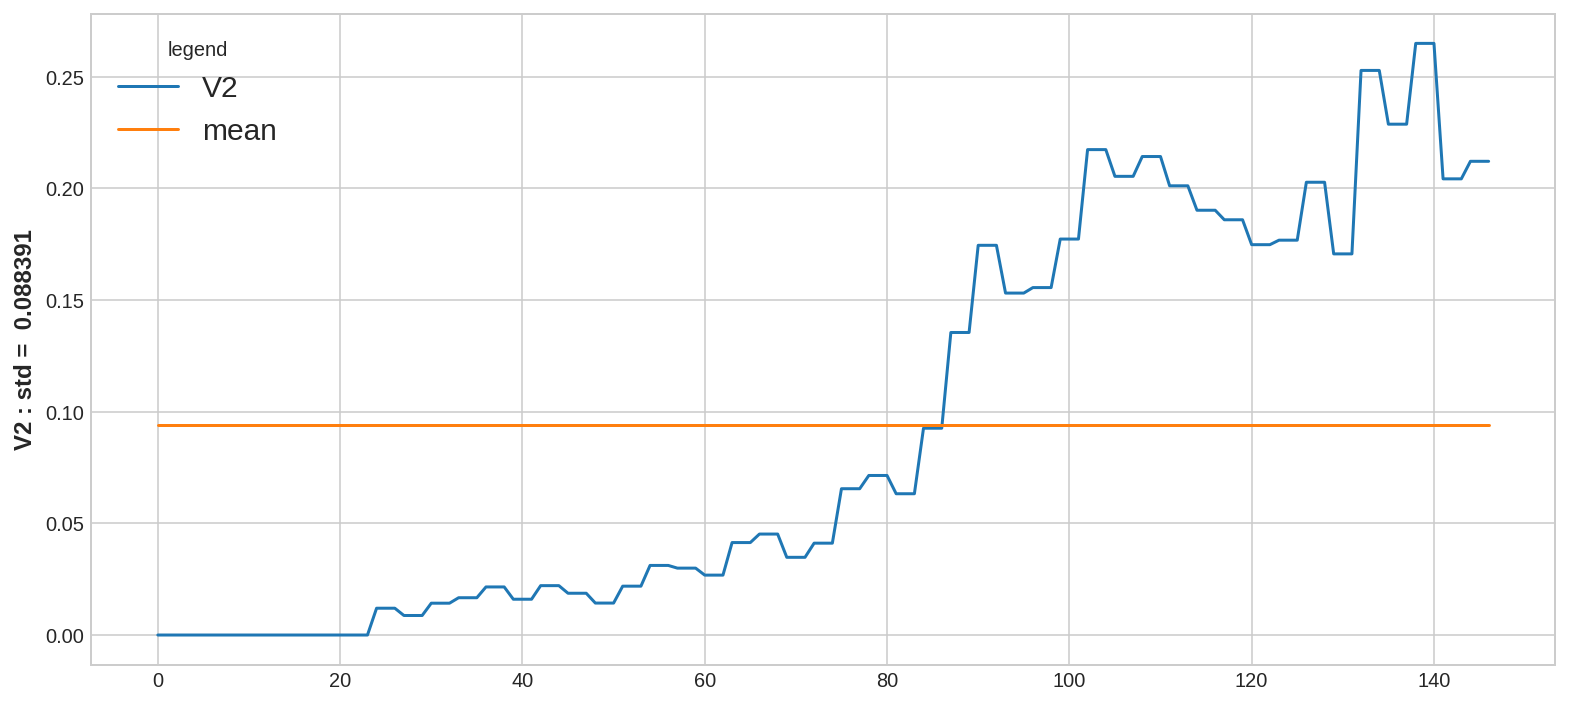

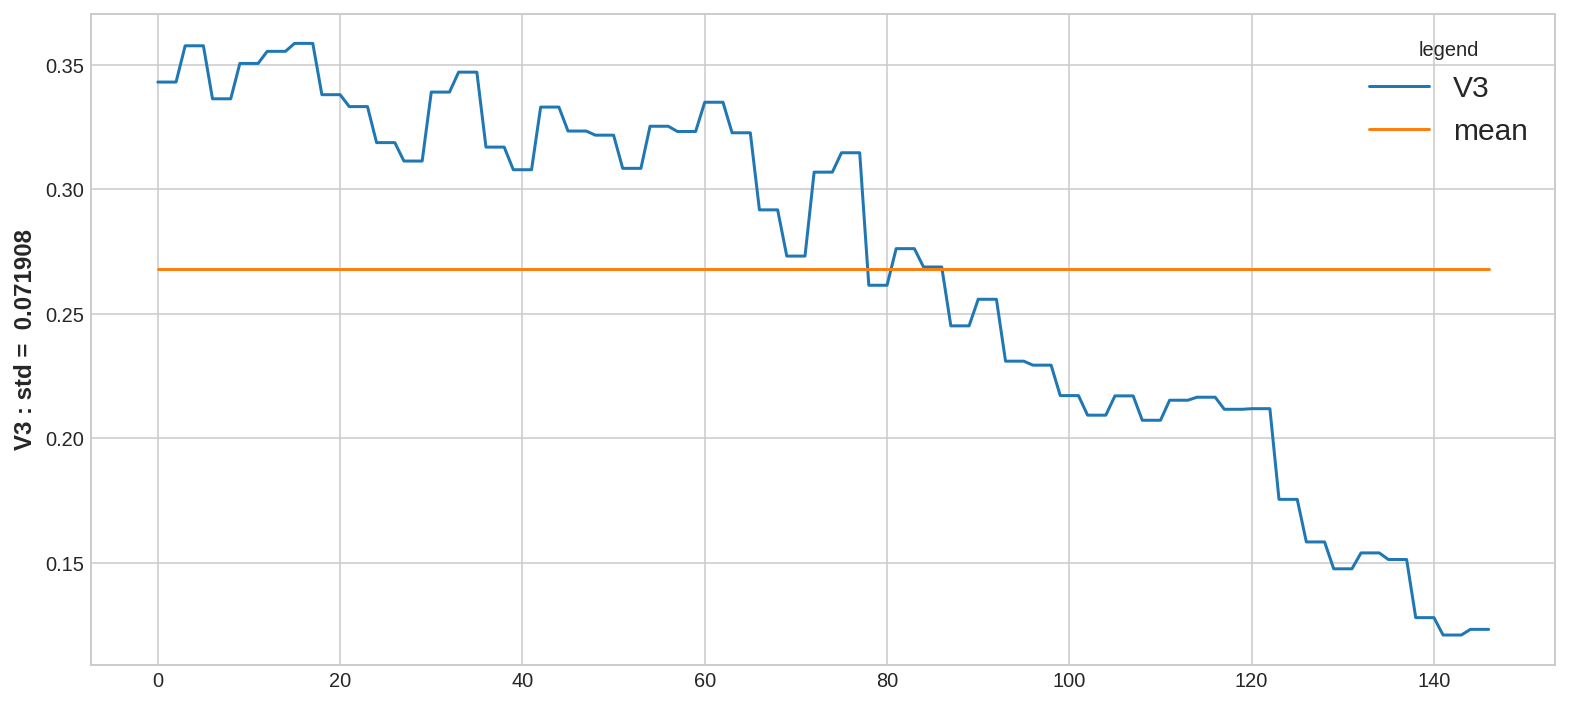

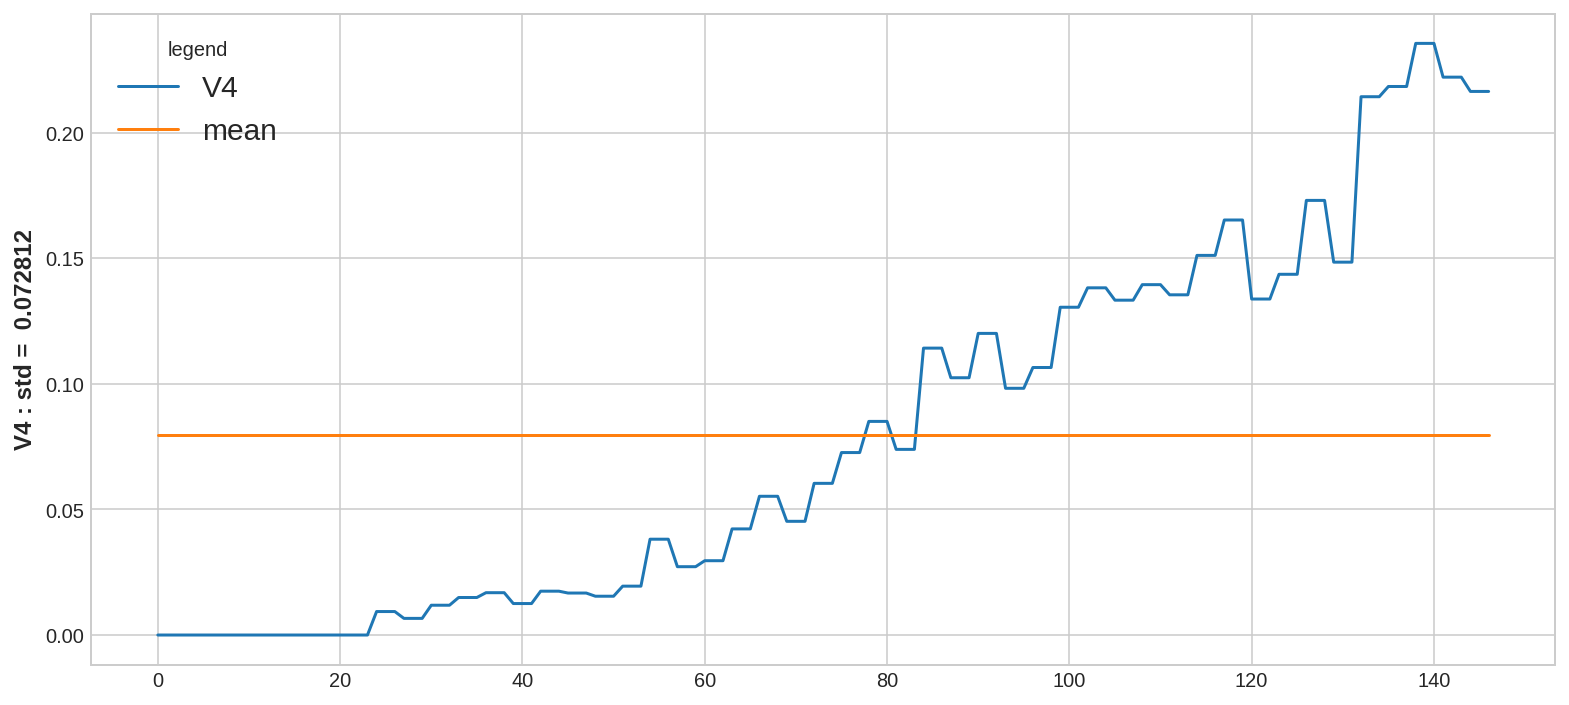

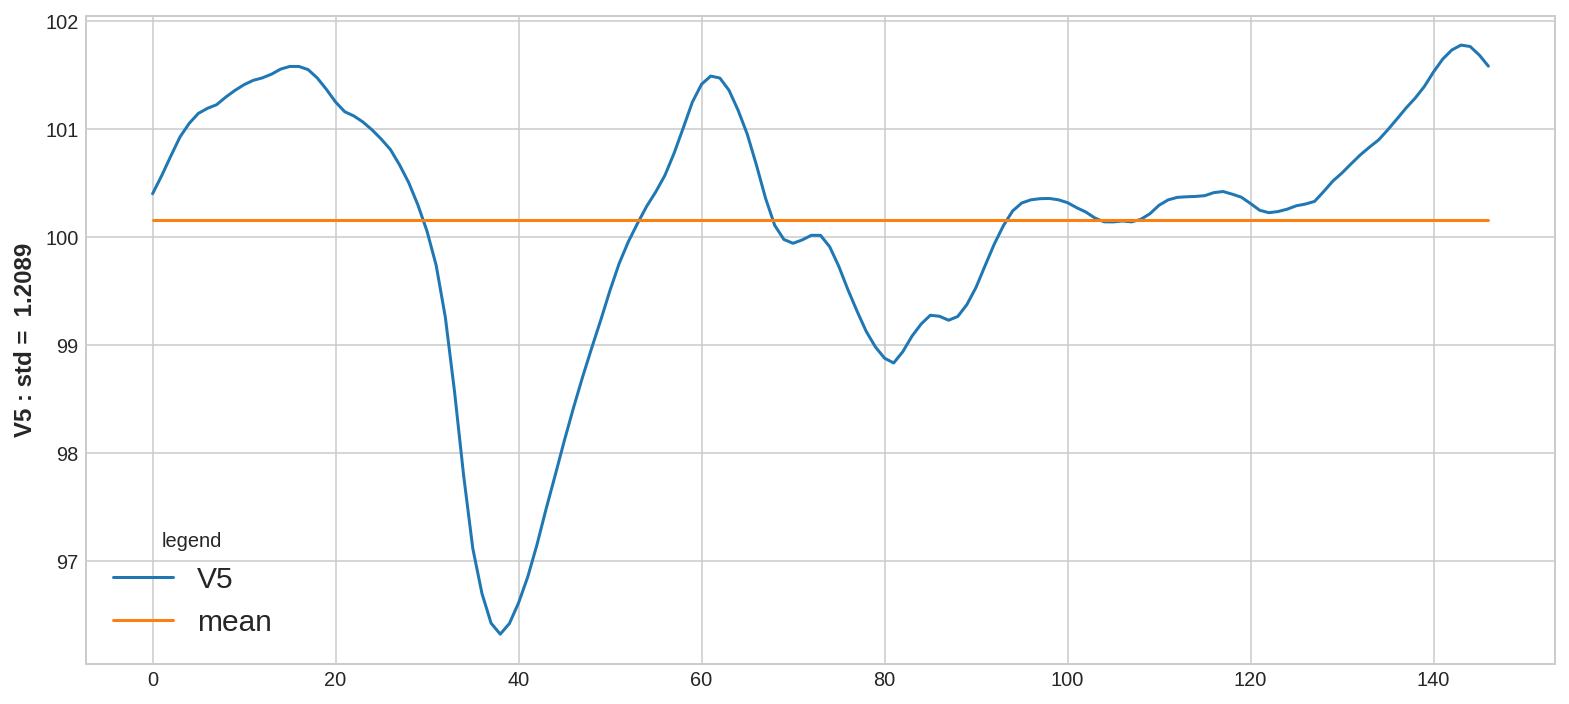

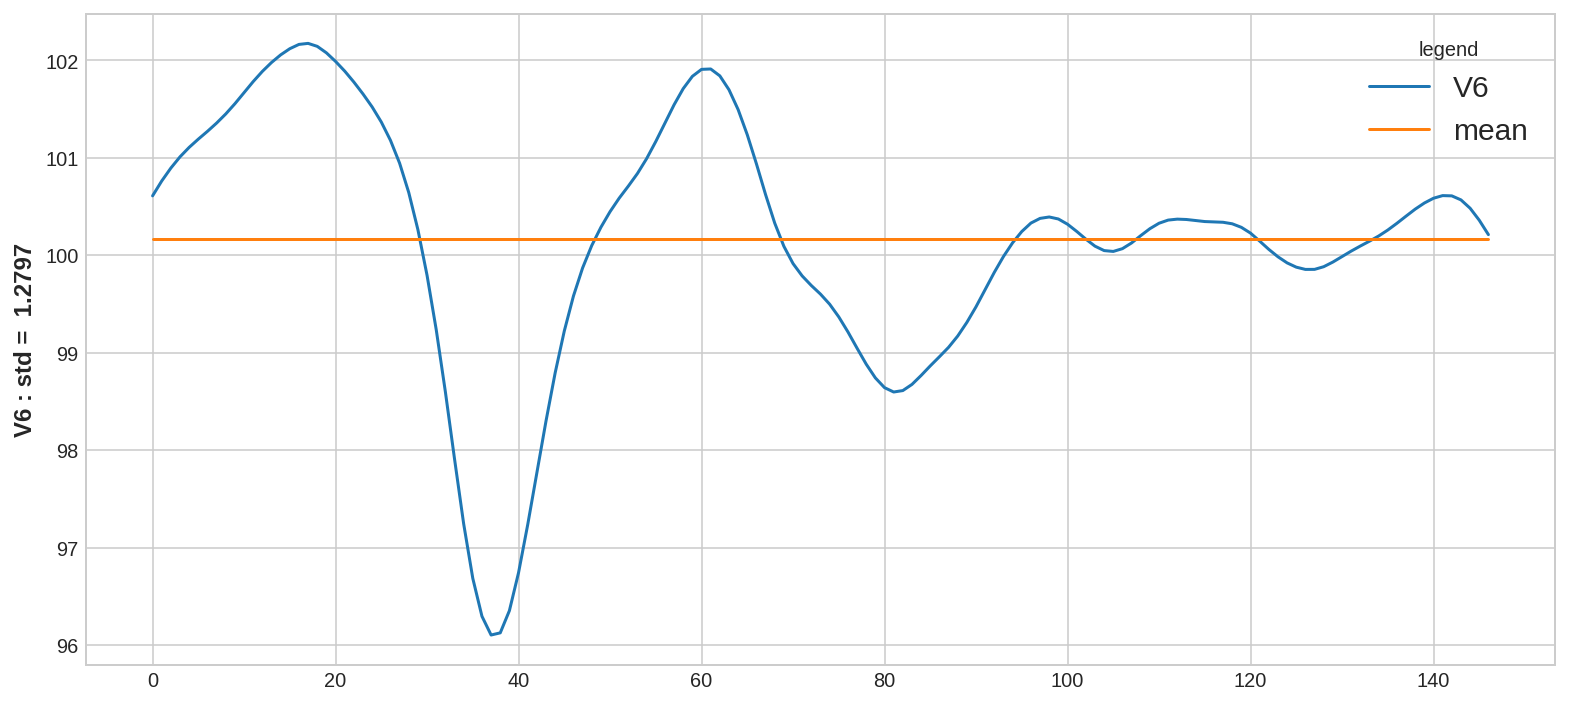

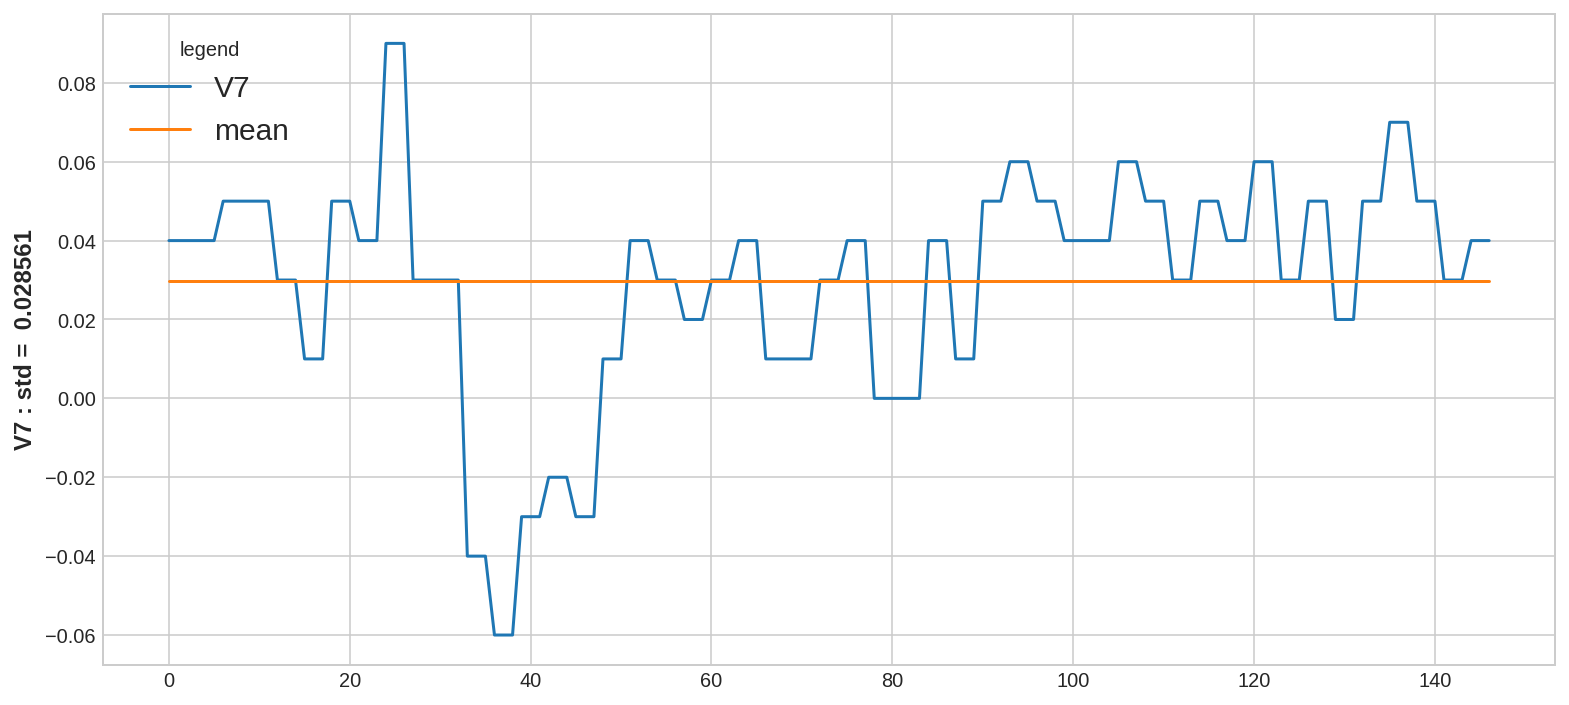

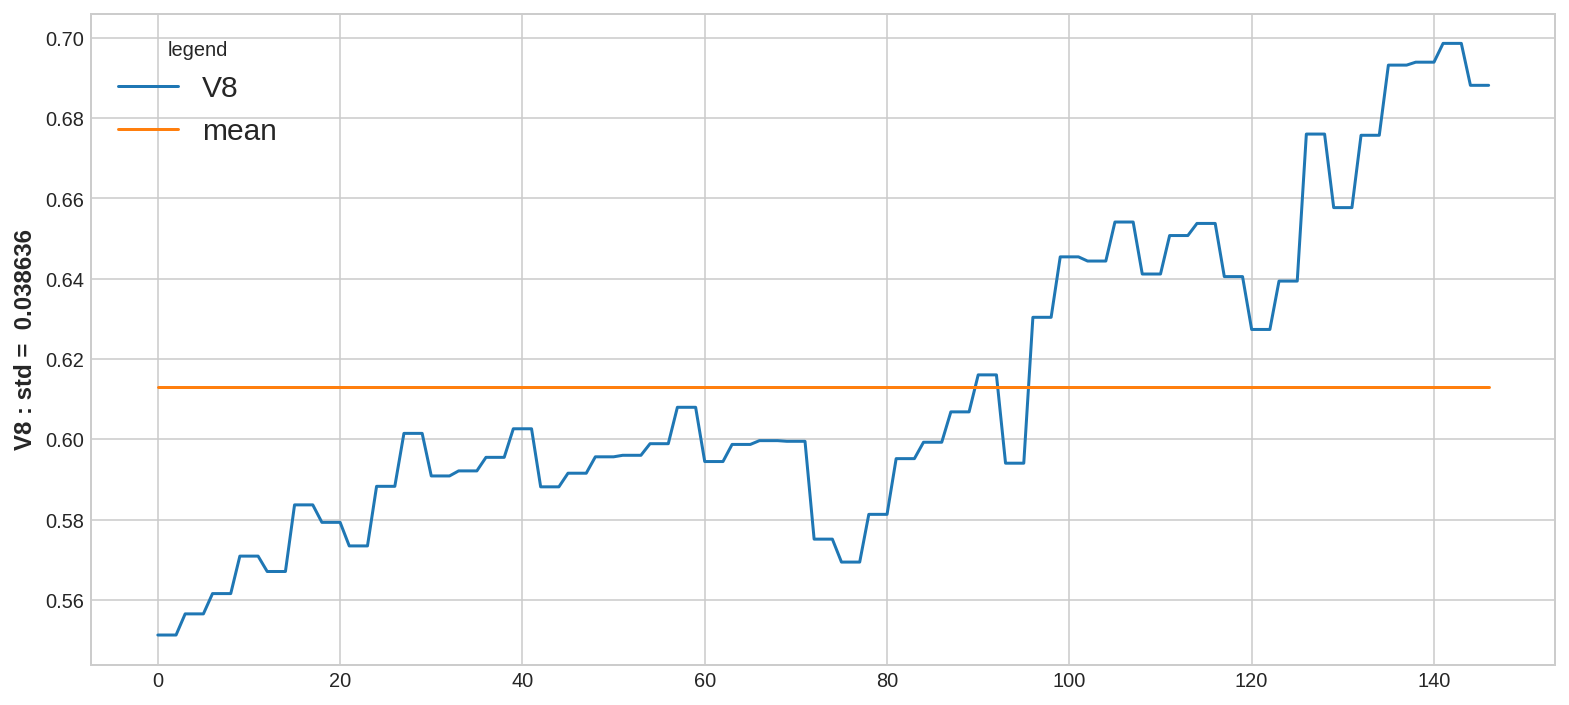

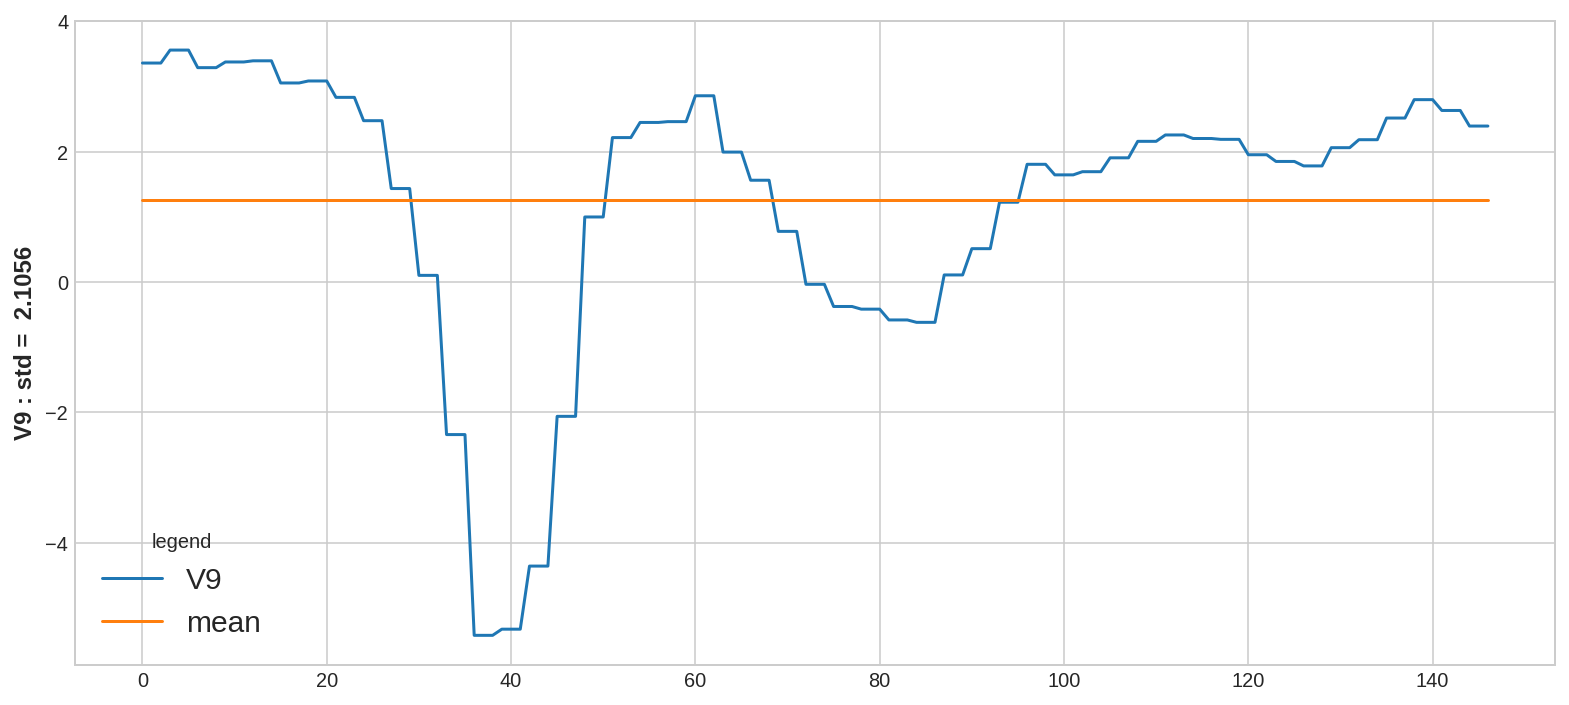

In [17]:
for e in ["V"+str(i) for i in range(1,10)]:
    fig, ax = plt.subplots()
    var = data[e]
    mean = var.mean()
    std = var.std()
    ax.plot(var)
    ax.plot(np.ones(len(var))*mean, label="mean")
    ax.set_ylabel(e+f' : std = {std : .5}')
    ax.legend([e, "mean"], title="legend", prop={"size":15})
    
    

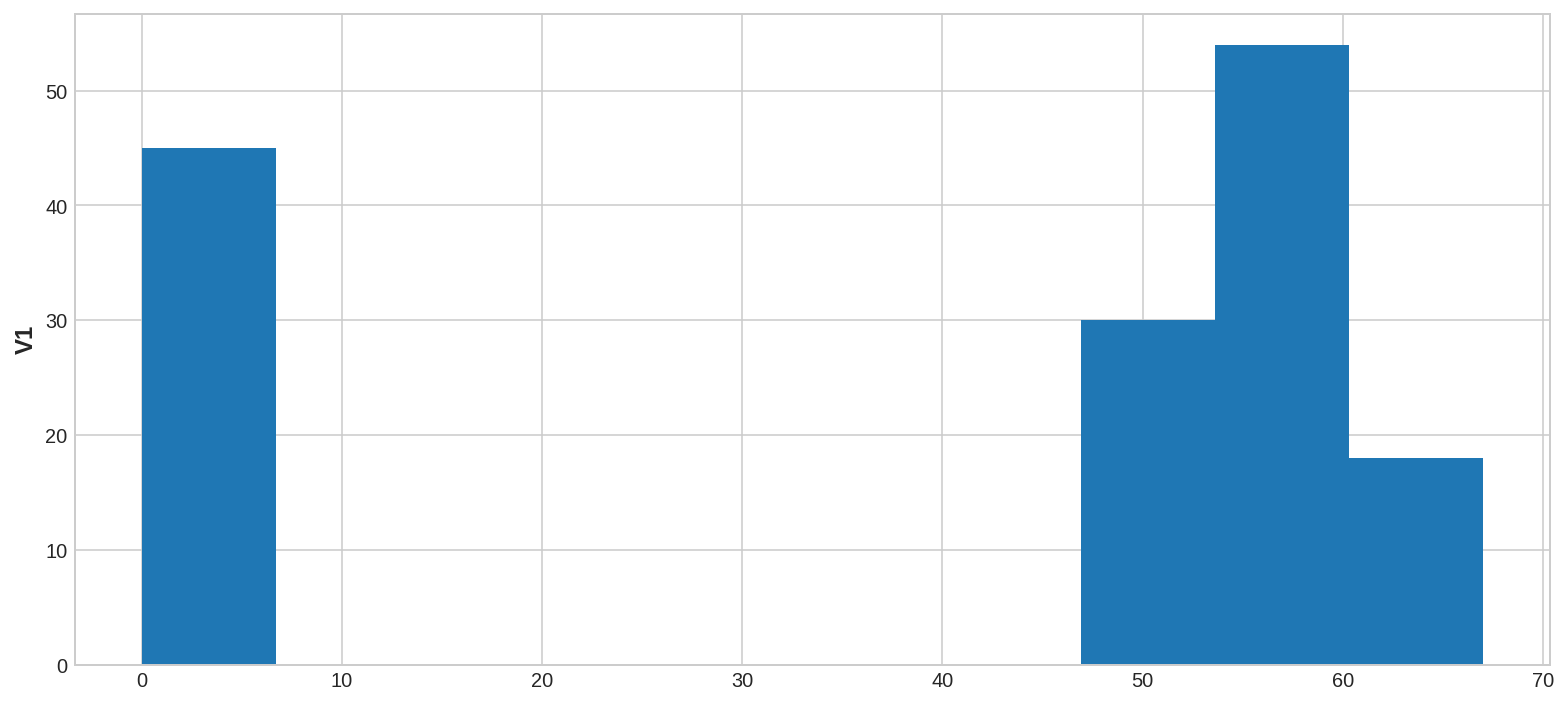

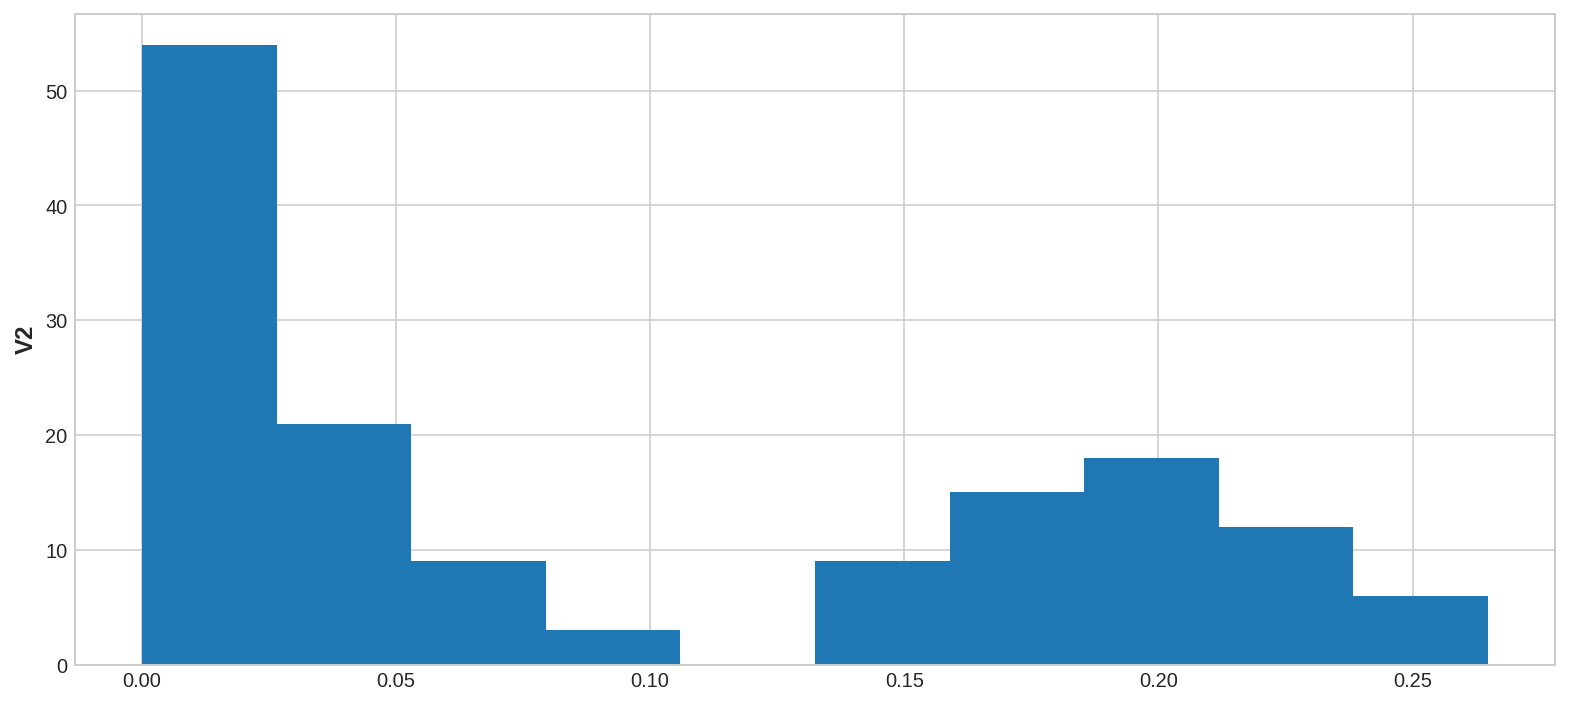

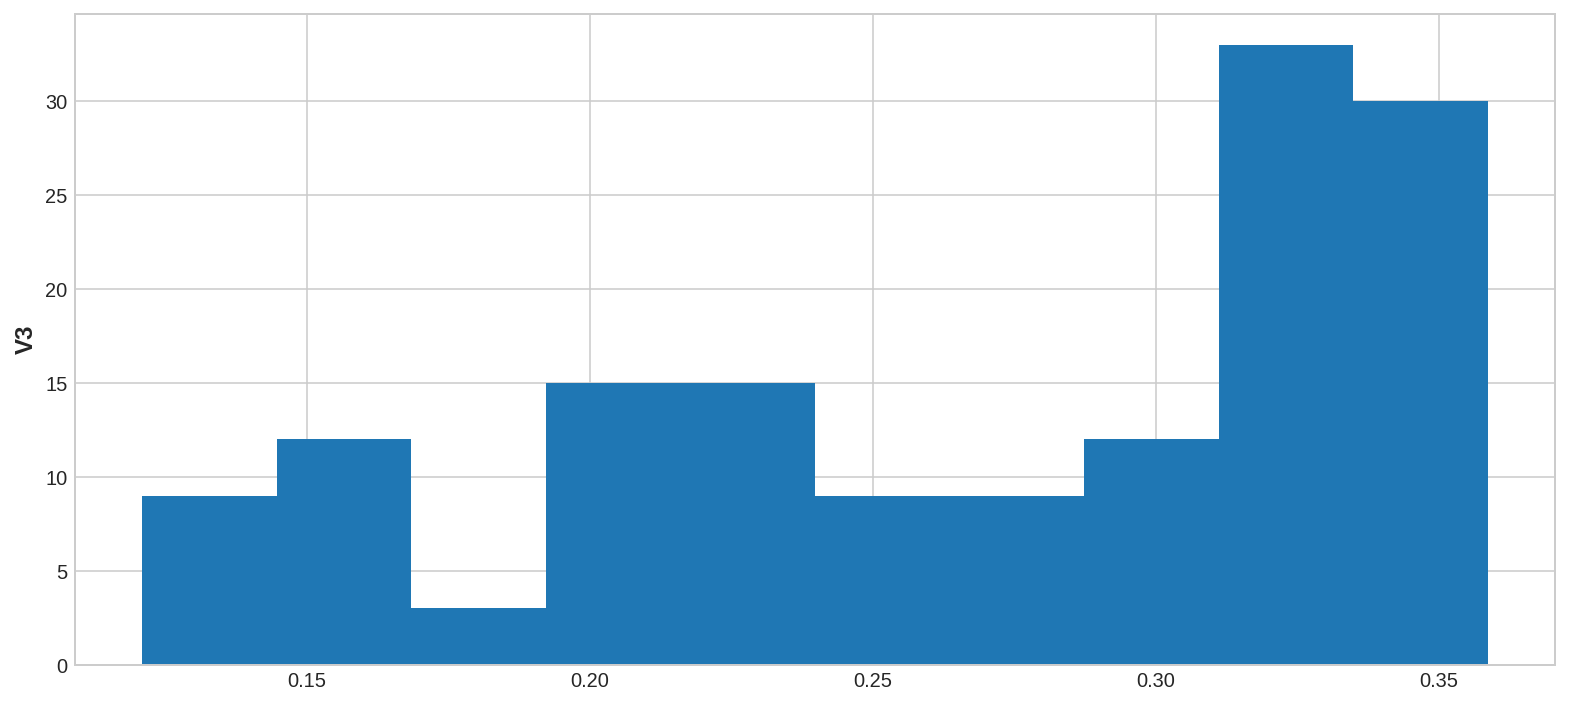

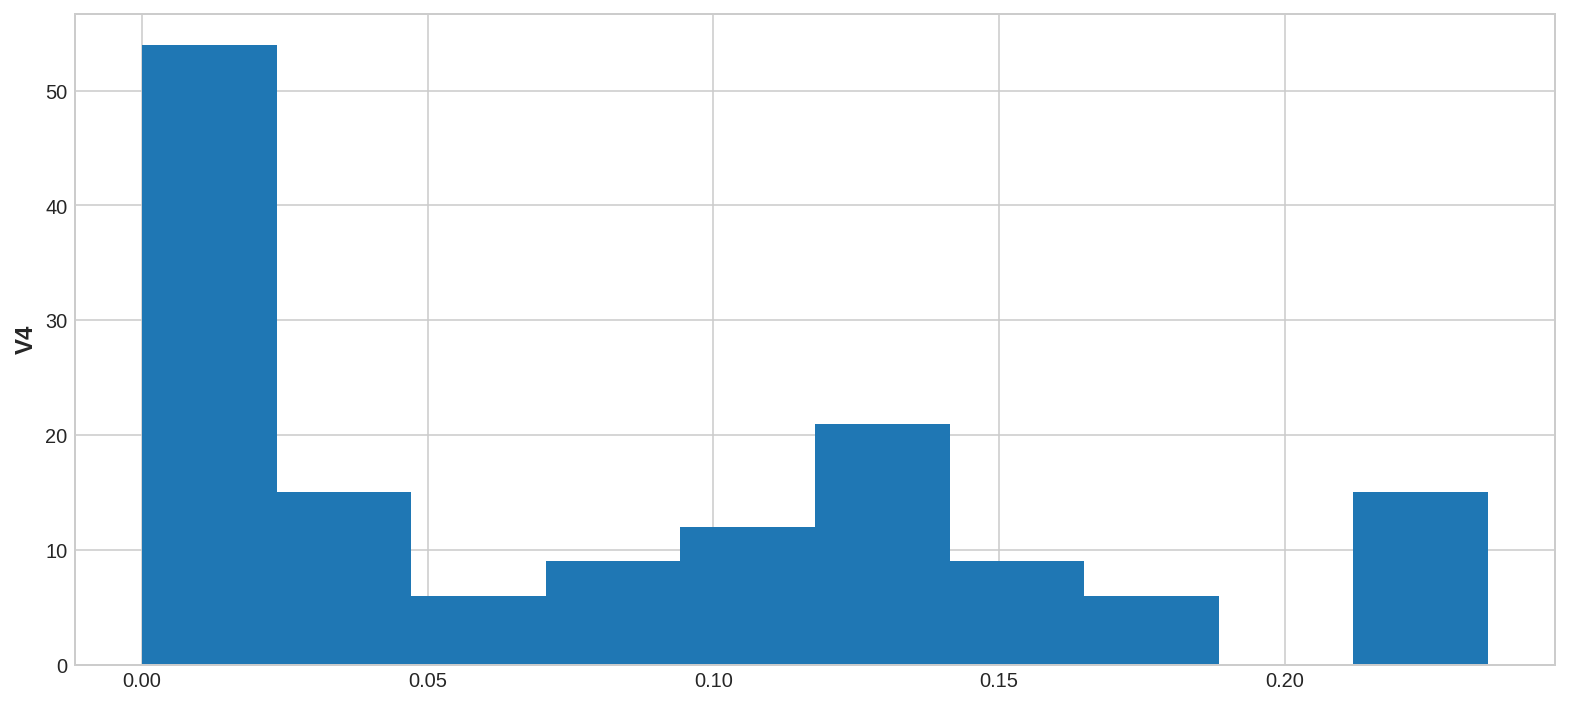

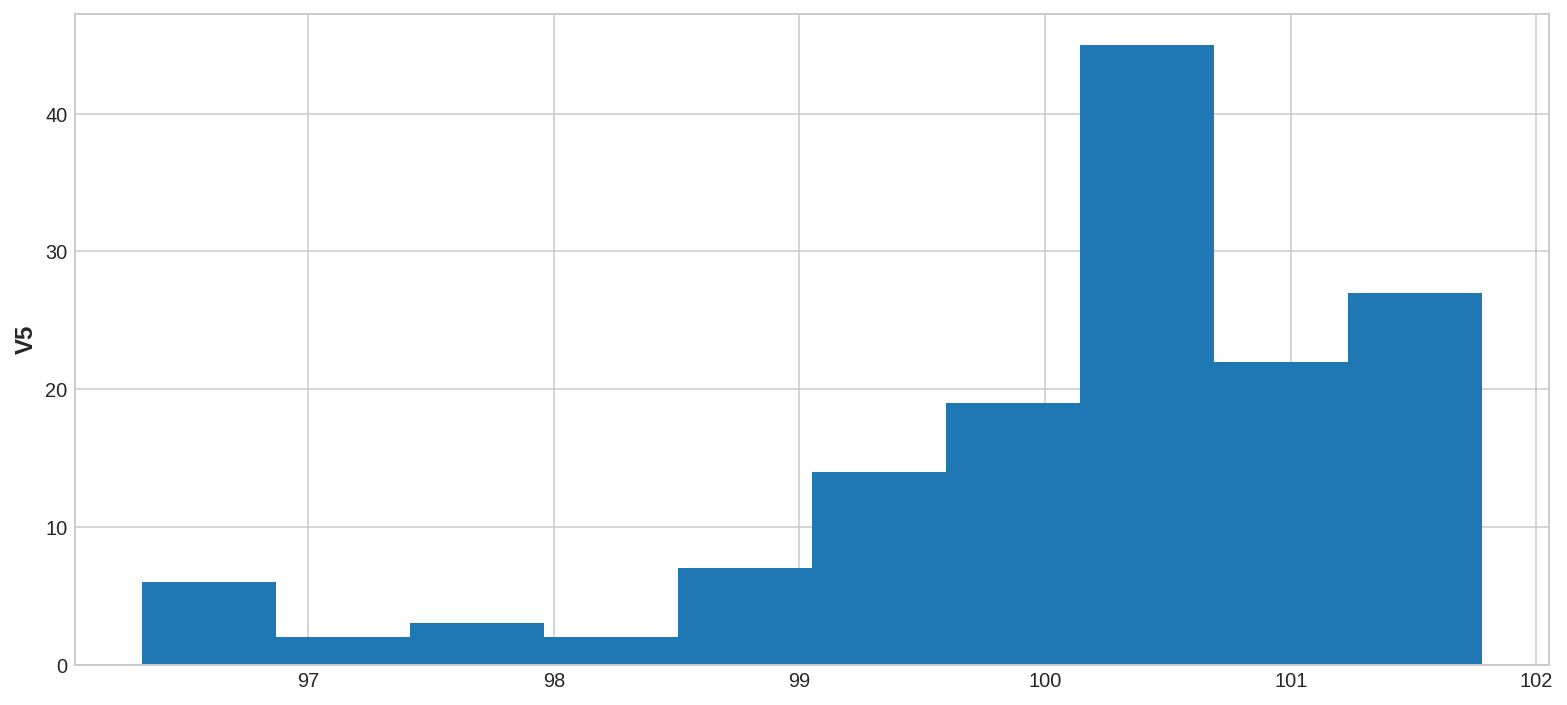

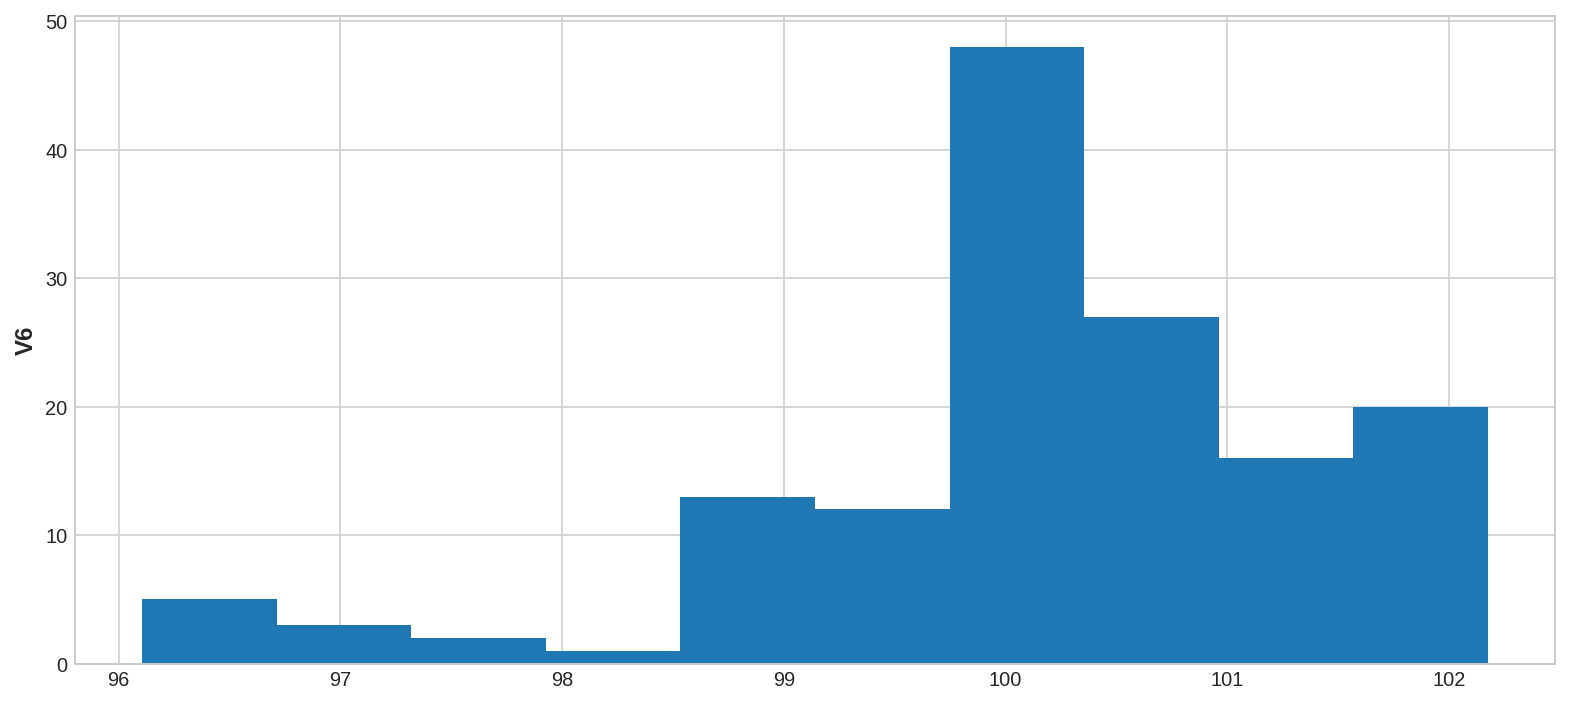

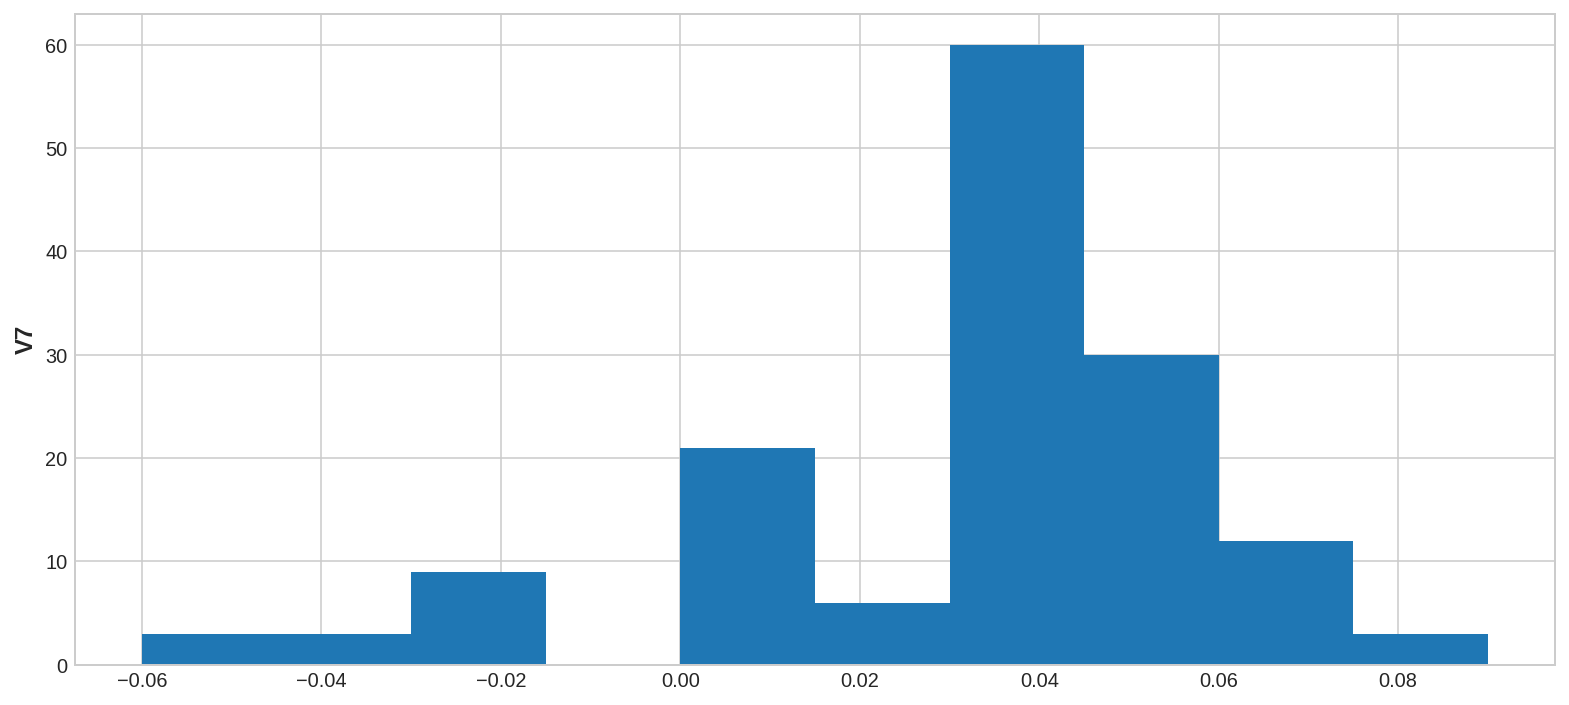

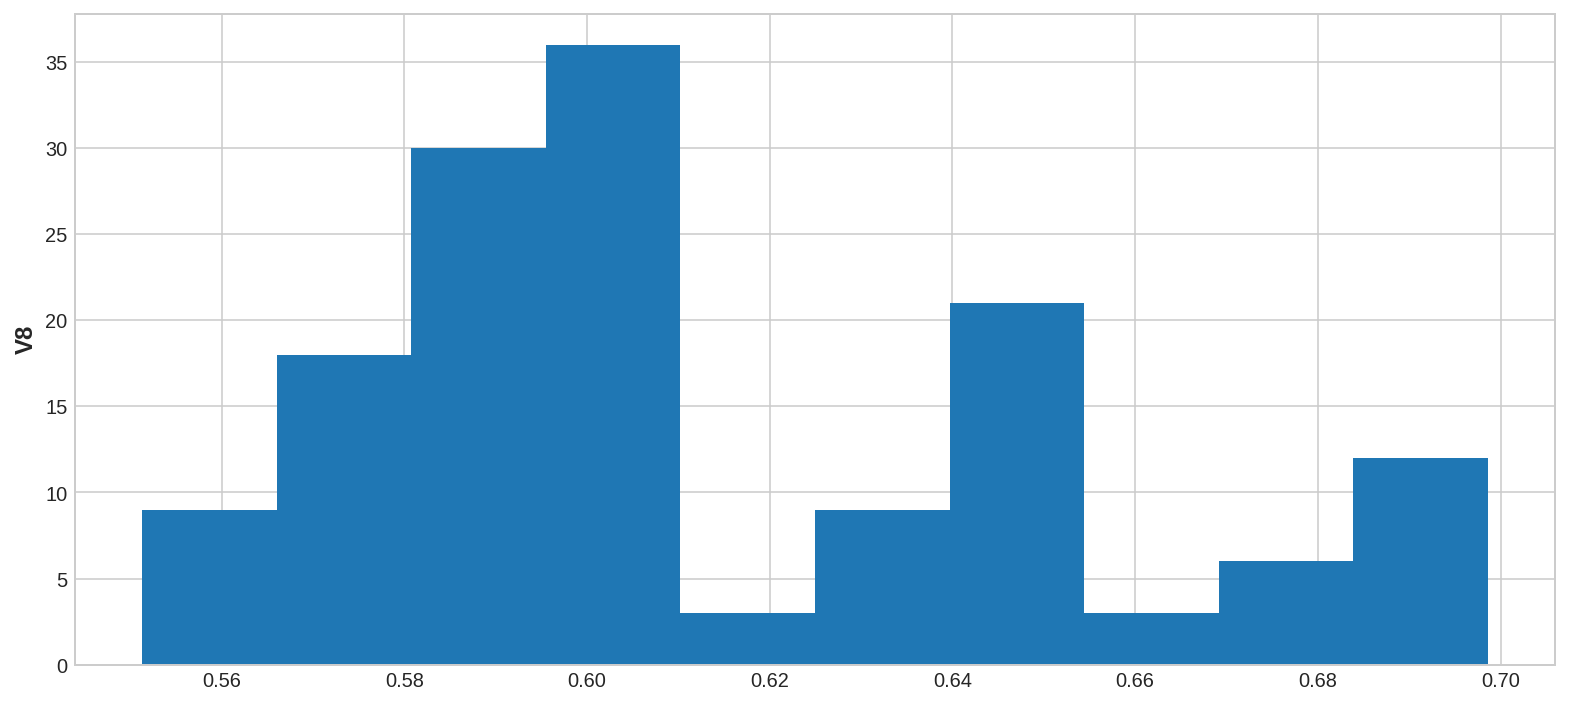

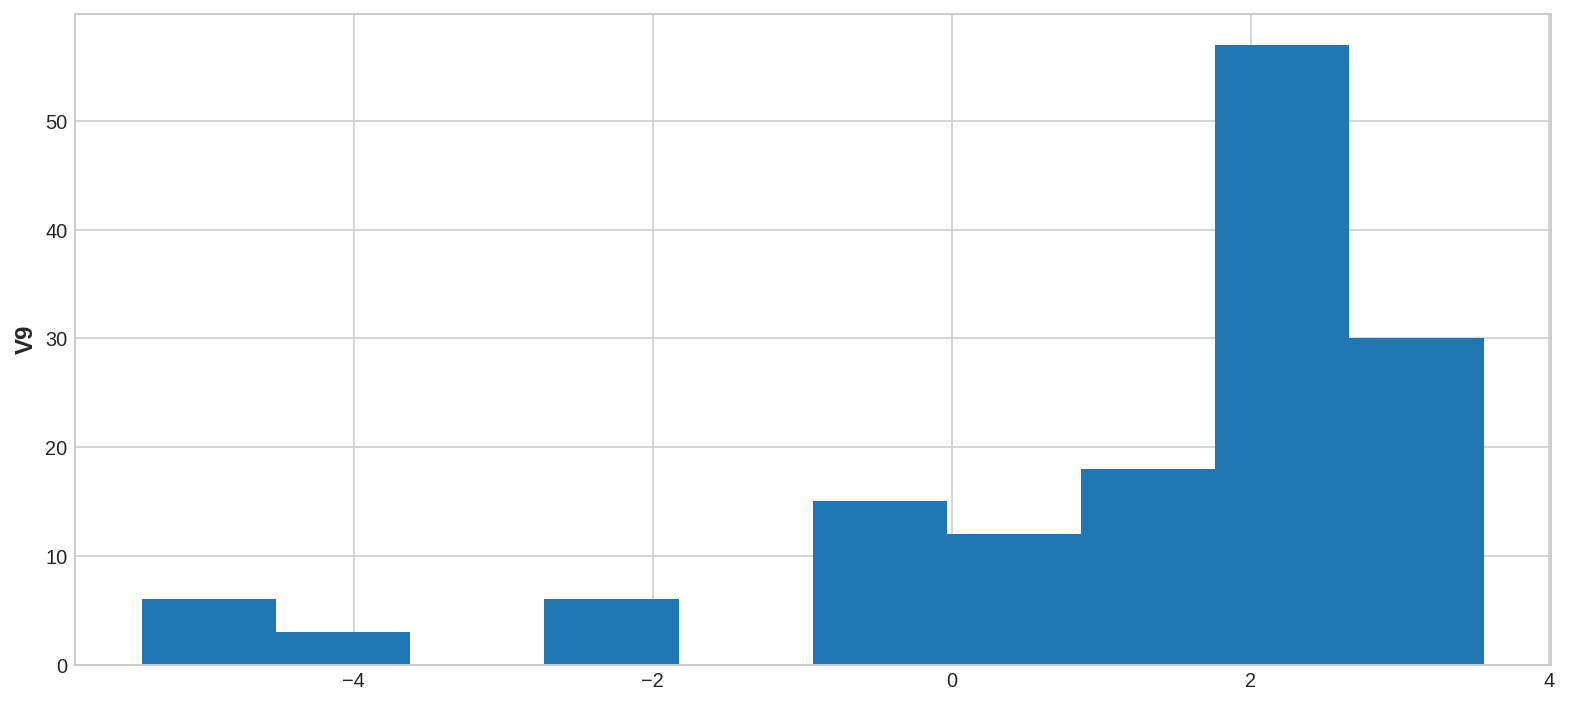

In [19]:
#histogrames for all anothers features varibles
for e in ["V"+str(i) for i in range(1,10)]:
    fig, ax = plt.subplots()
    var = data[e]
    ax.hist(var)
    ax.set_ylabel(e)

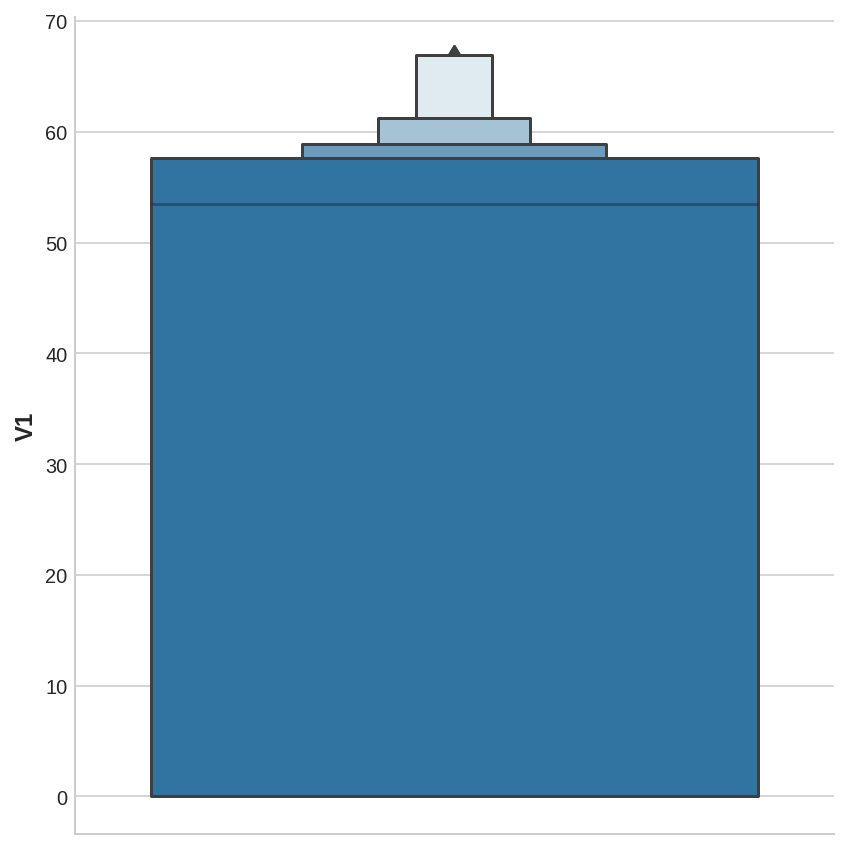

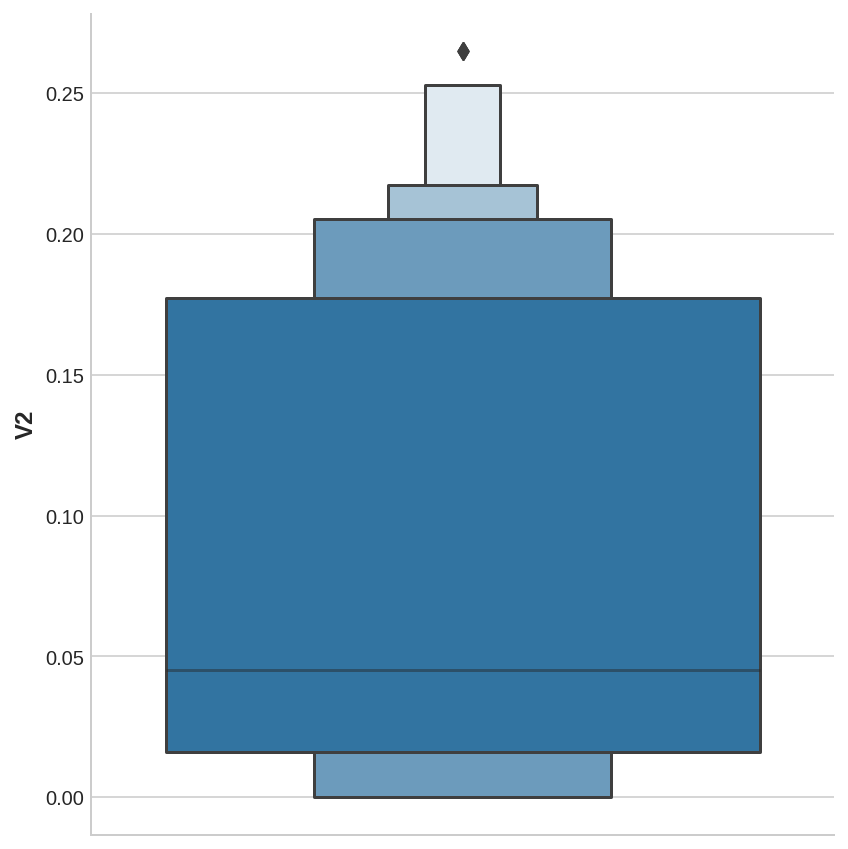

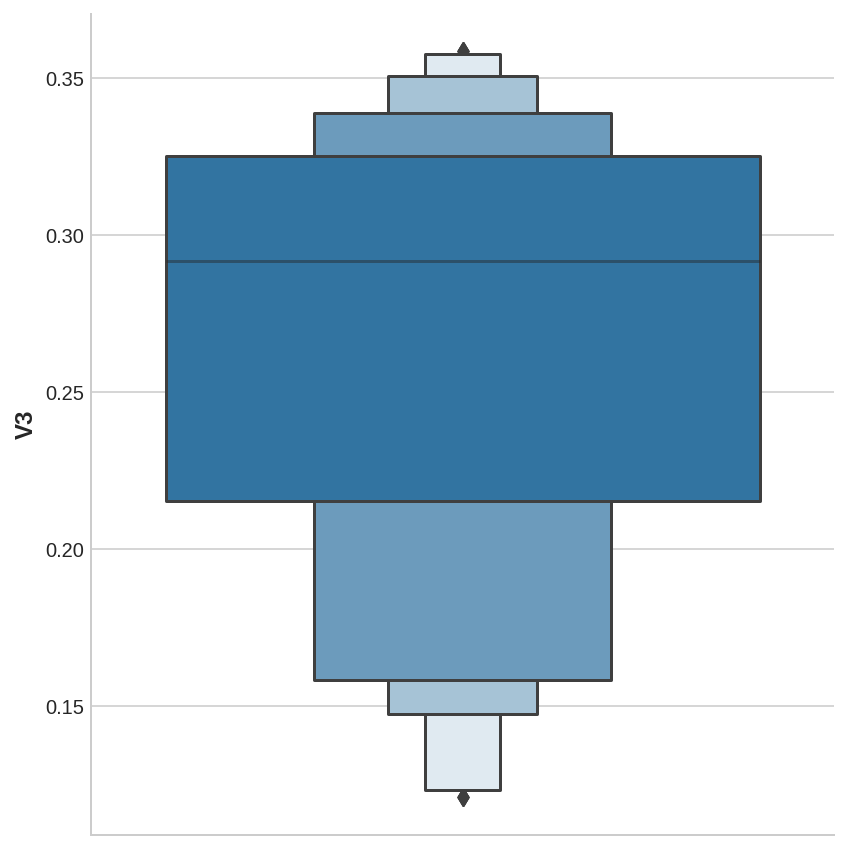

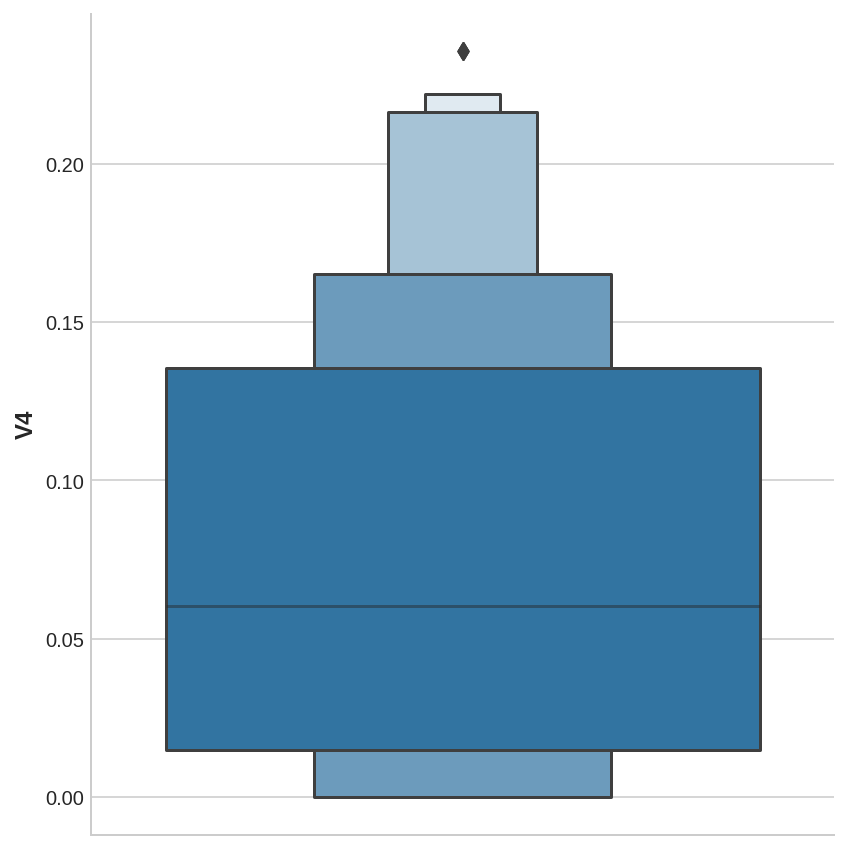

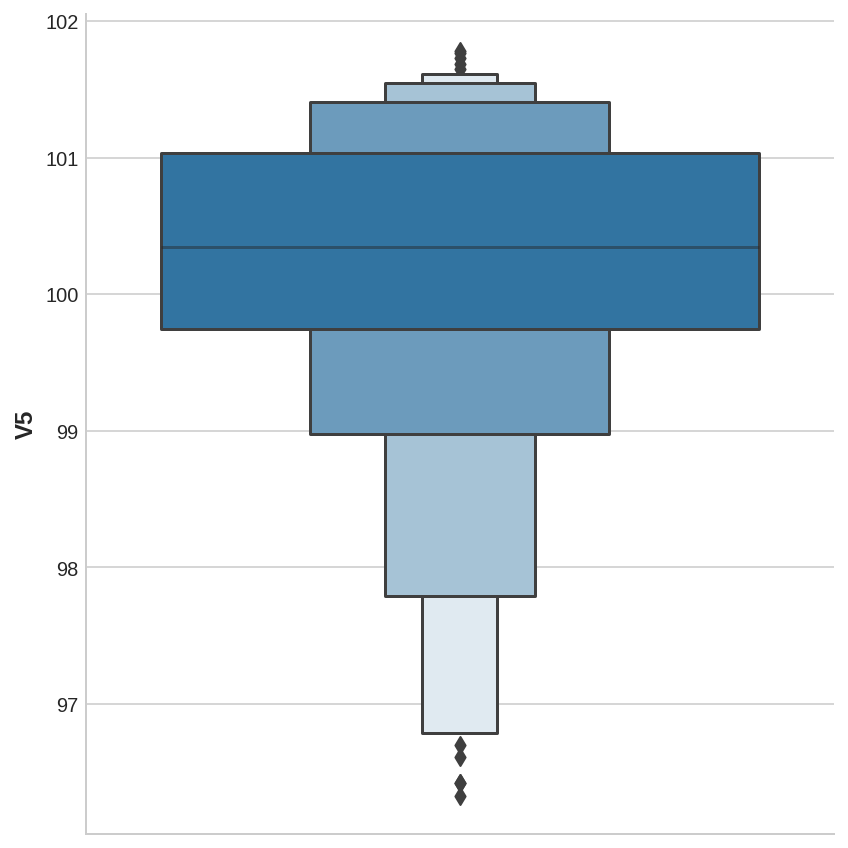

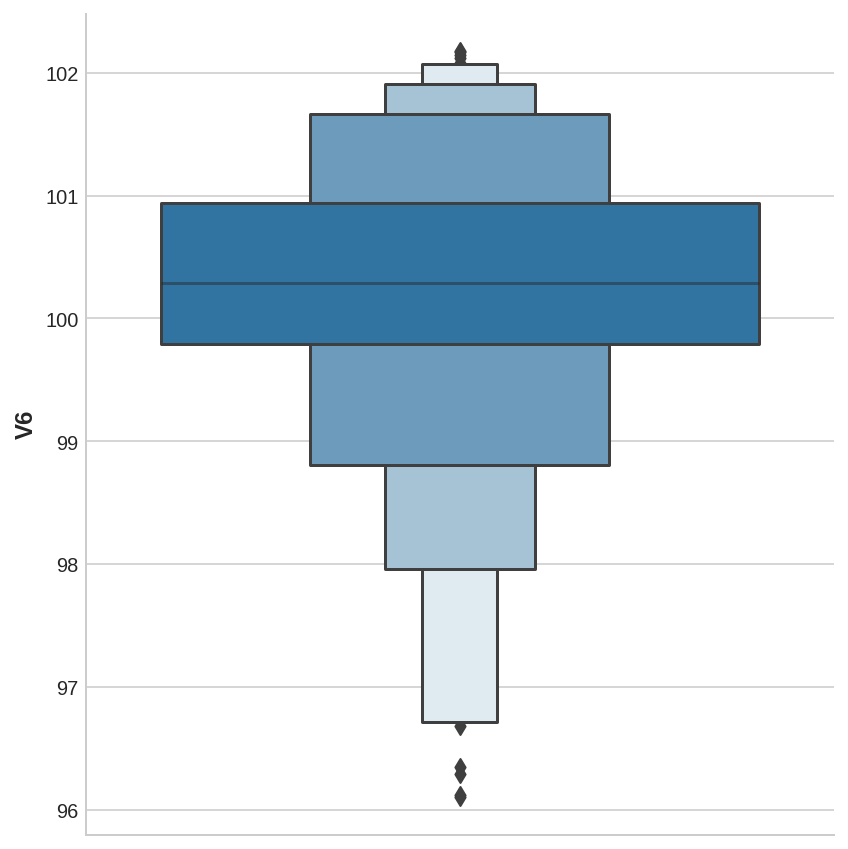

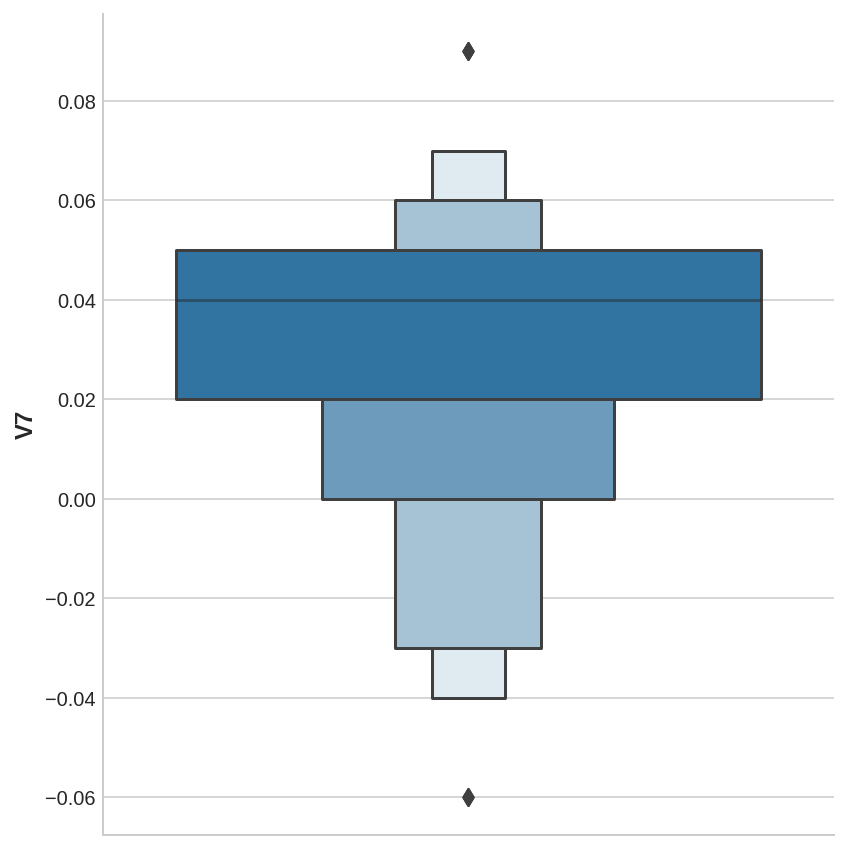

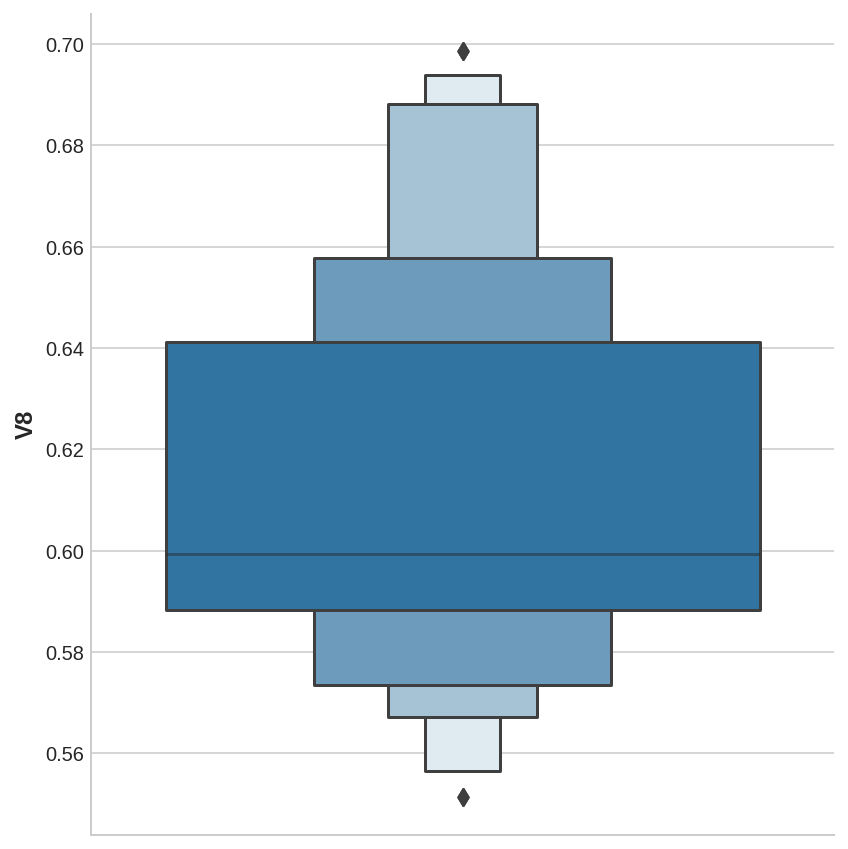

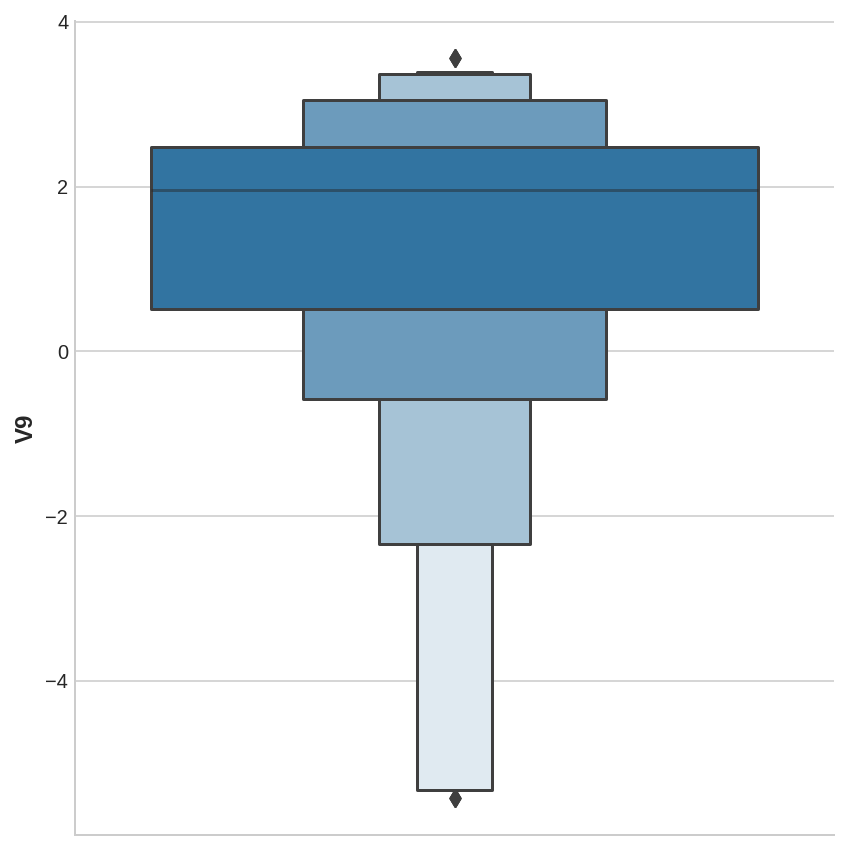

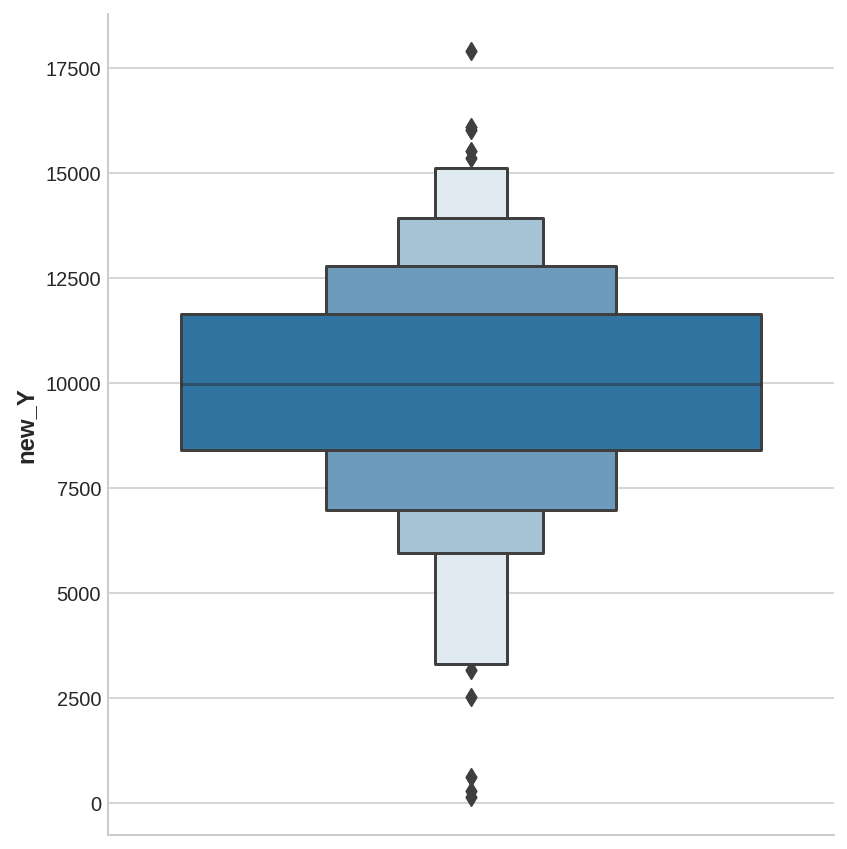

In [20]:
#Let's look at the box plots
for e in data[["V"+str(i) for i in range(1,10)]+["new_Y"]]:
    sns.catplot(y=e, data=data, kind="boxen", height=6)


*****Check linear correlation of the data*****

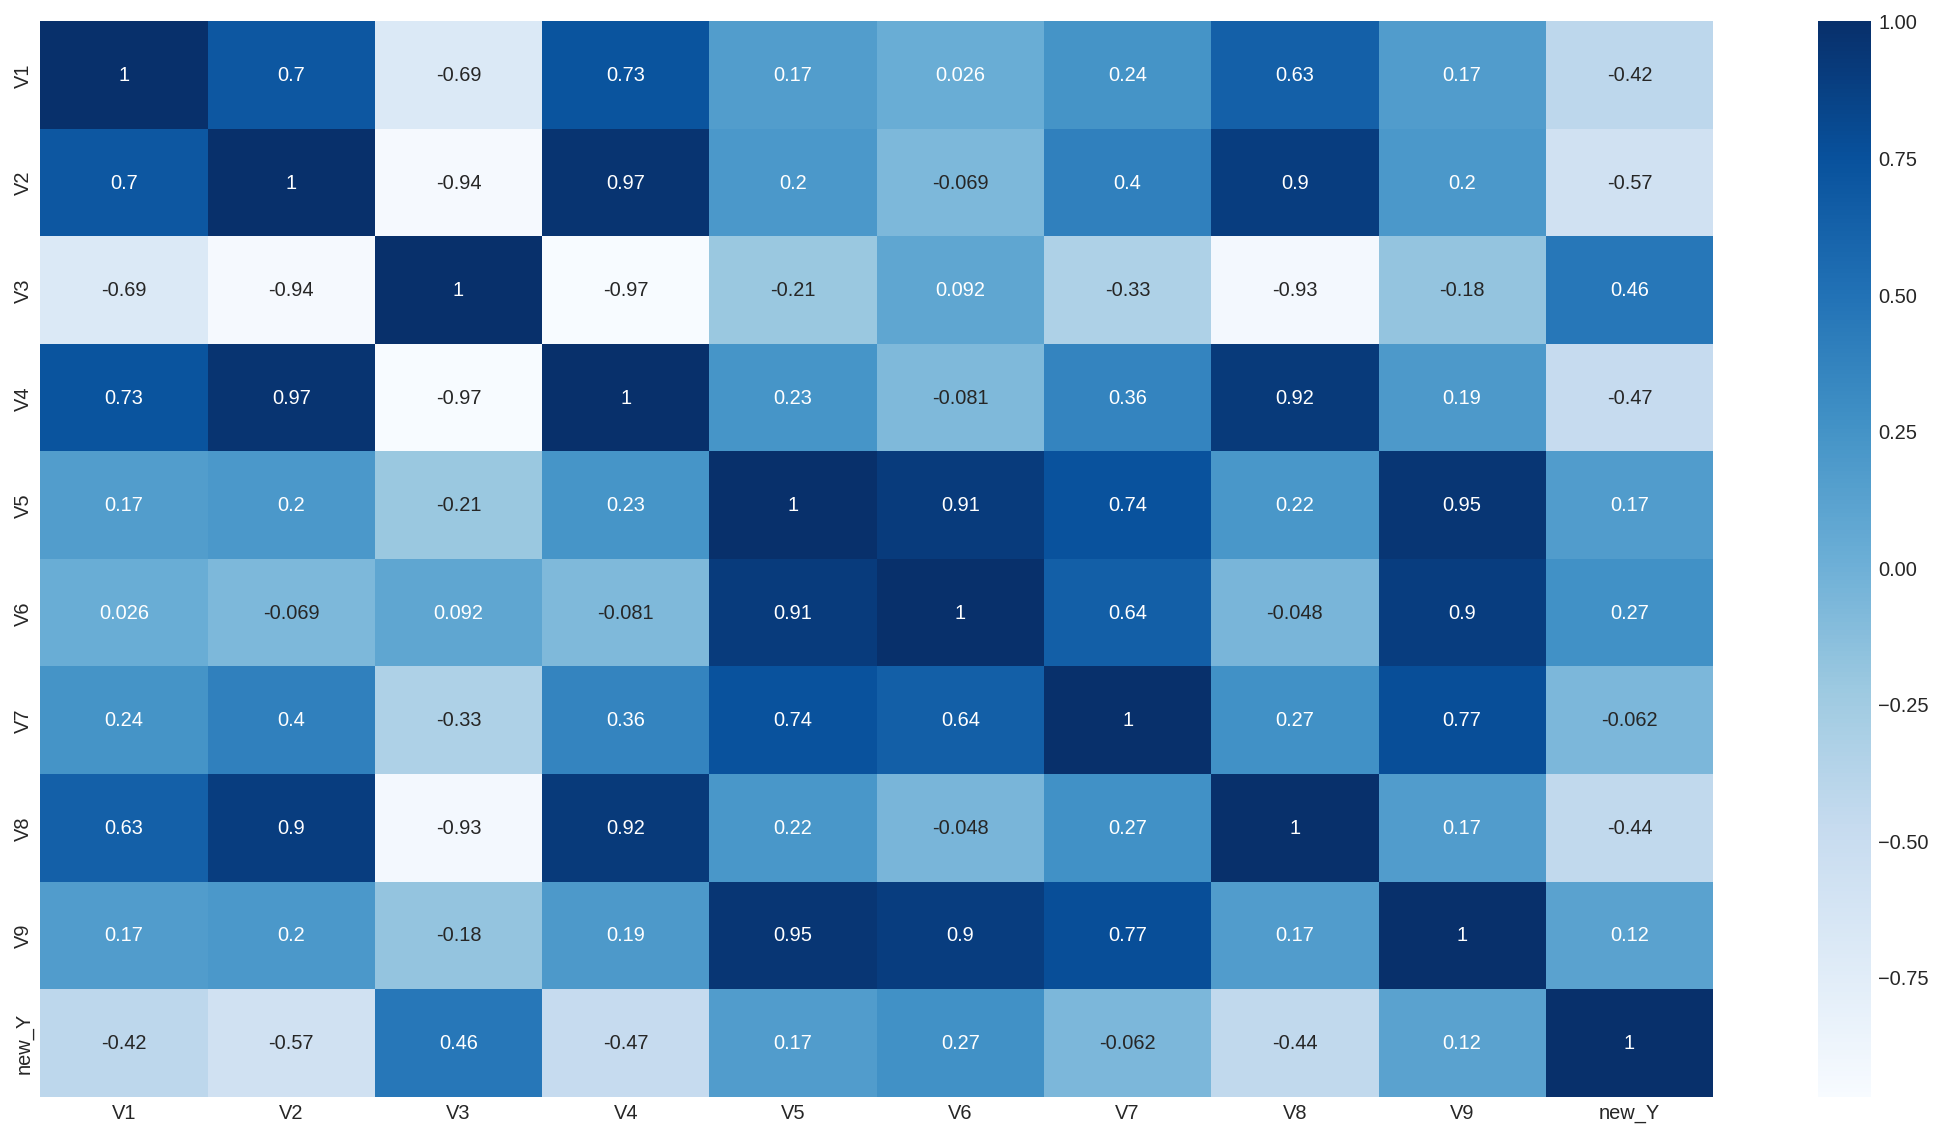

In [21]:
plt.figure(figsize=(15,8))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap="Blues")
plt.show()

**Let see correlations with target and features in one graph**

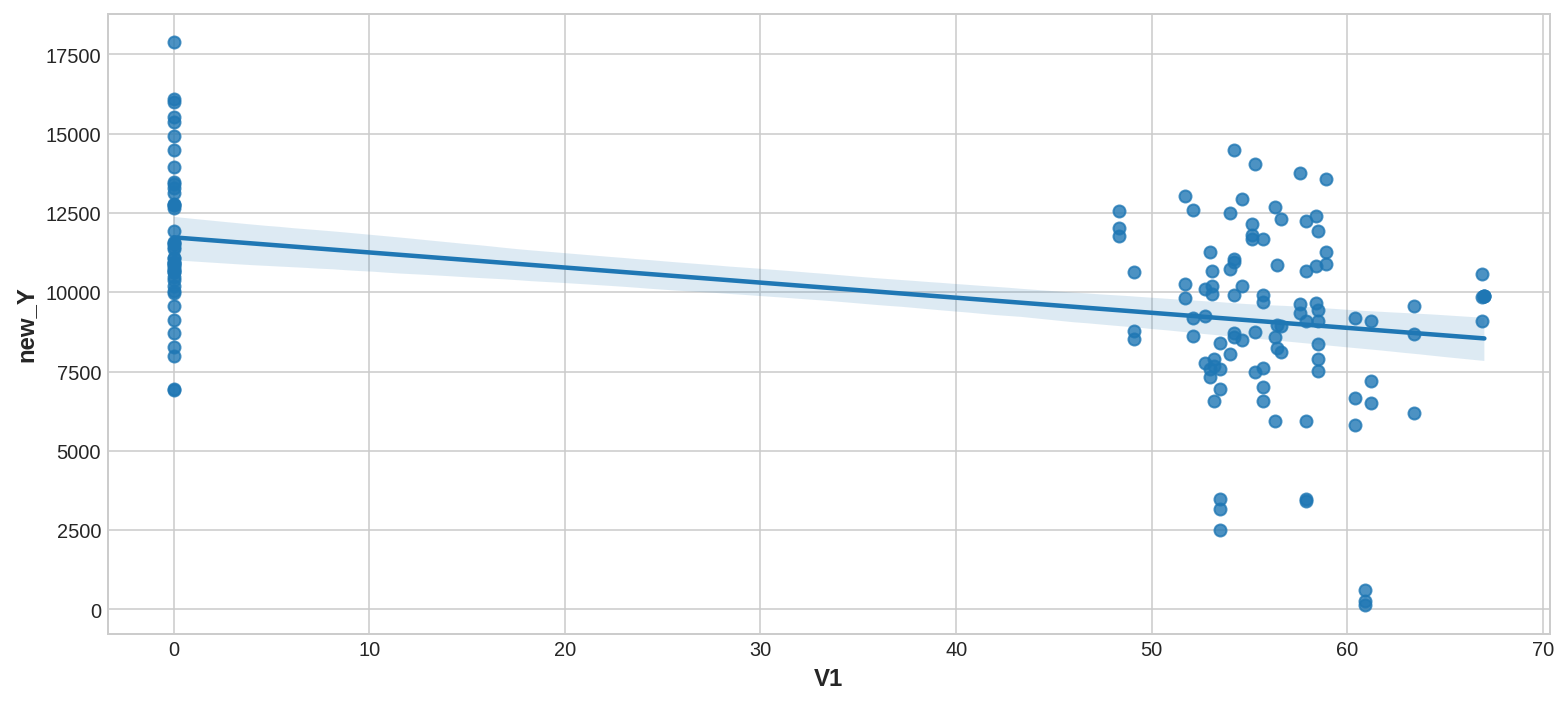

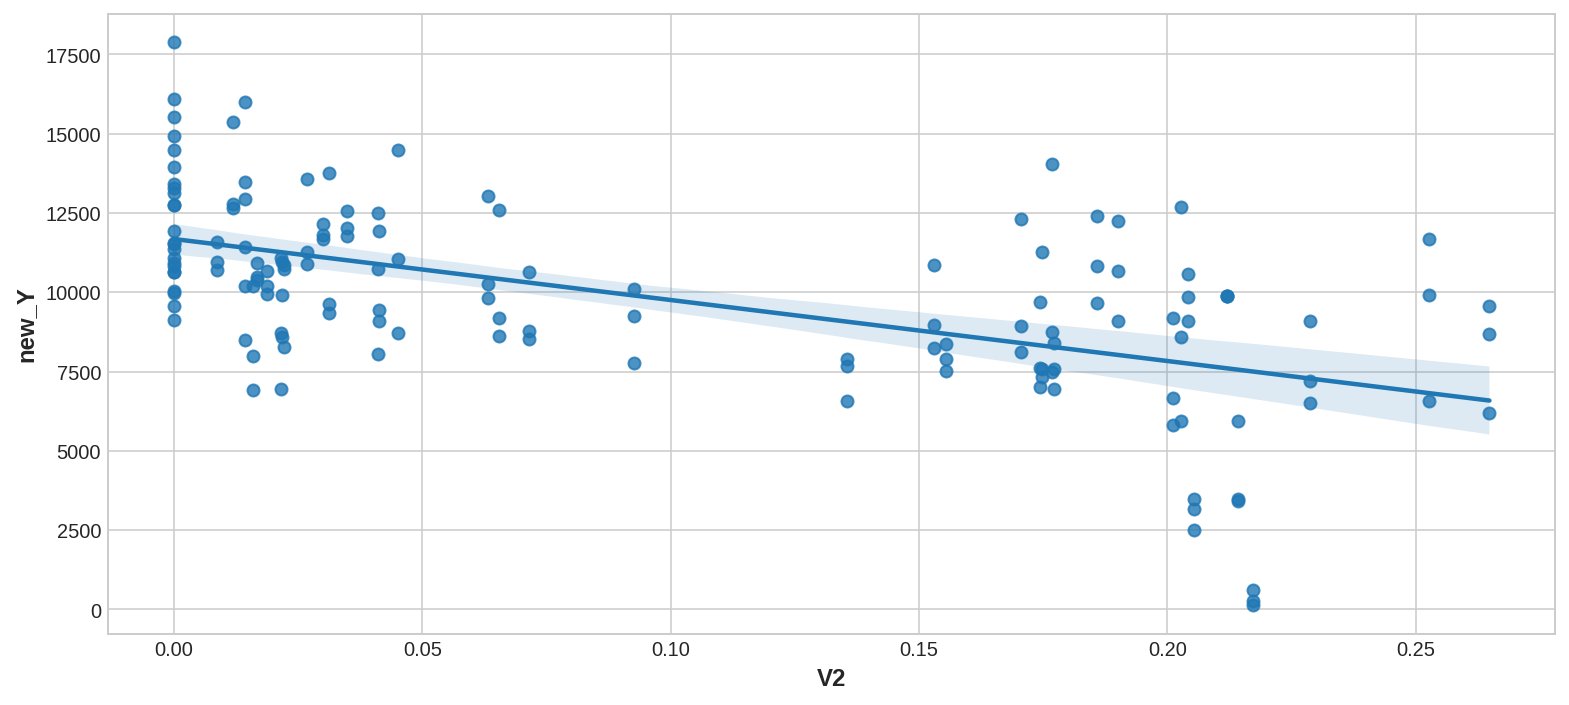

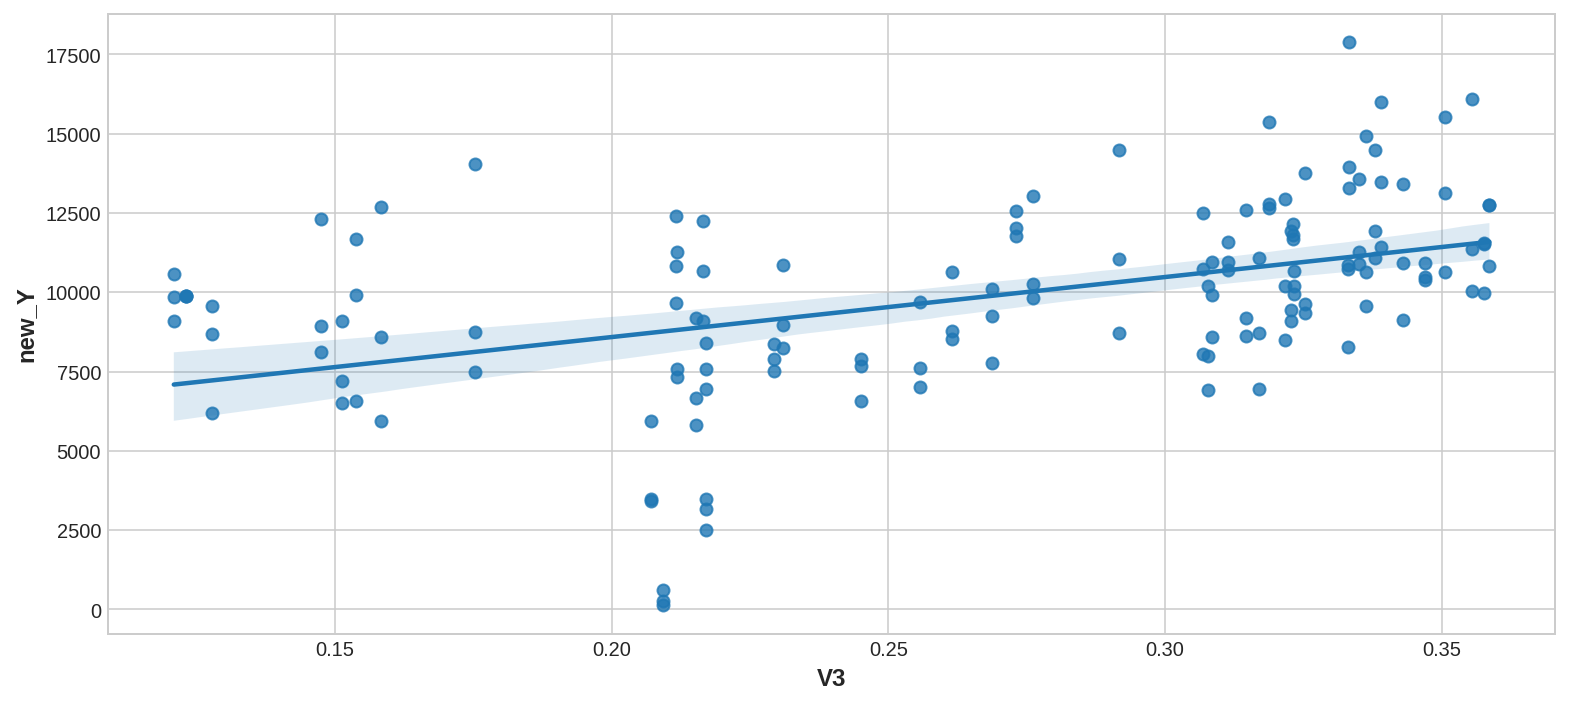

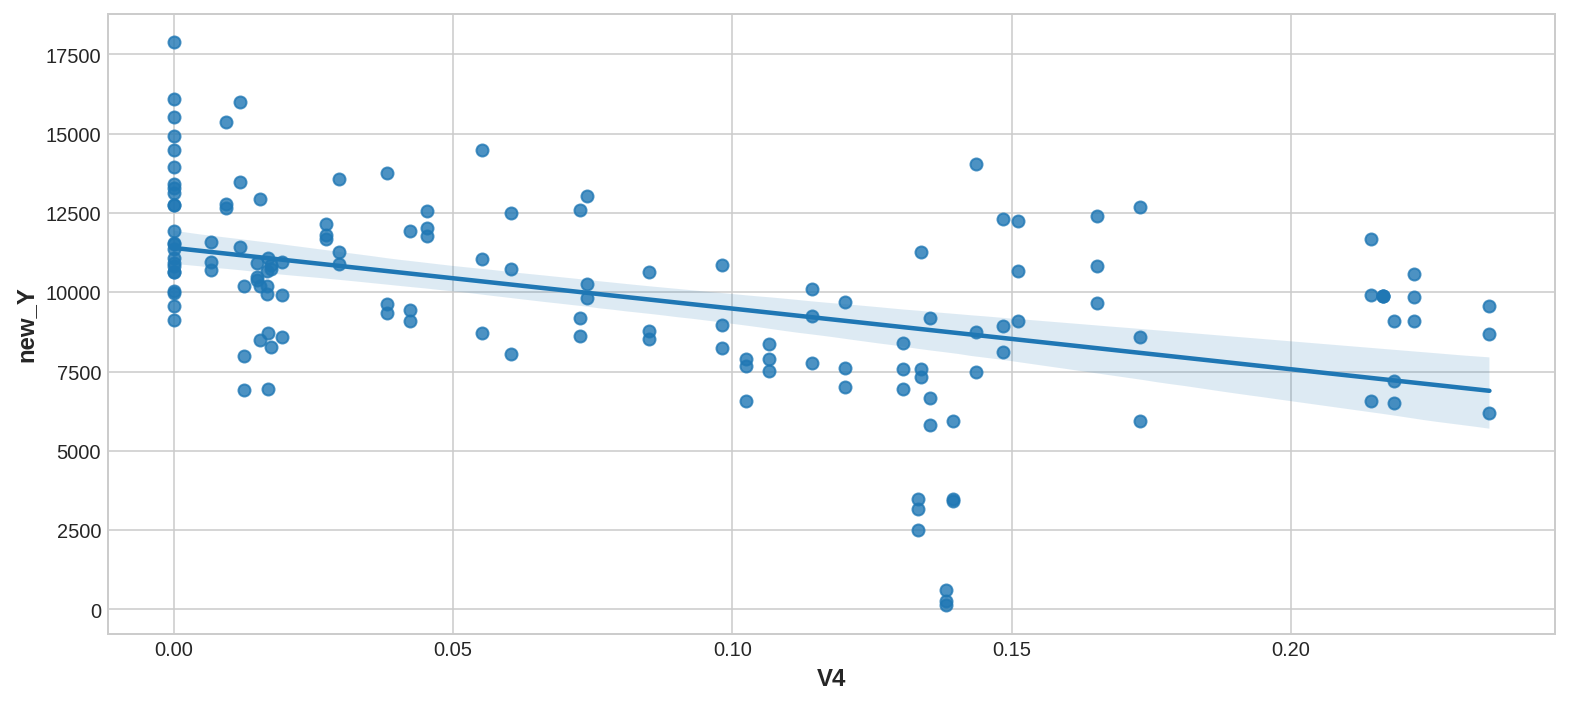

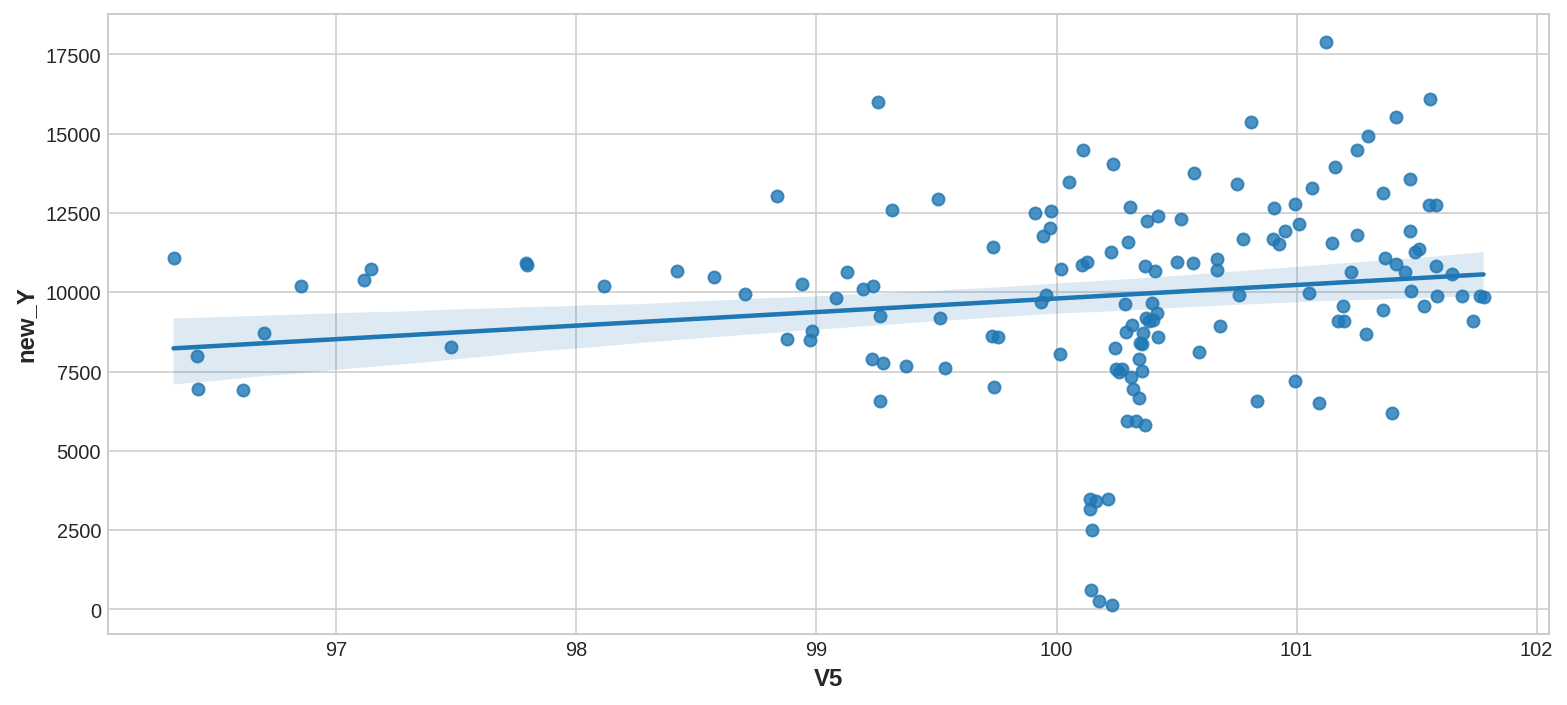

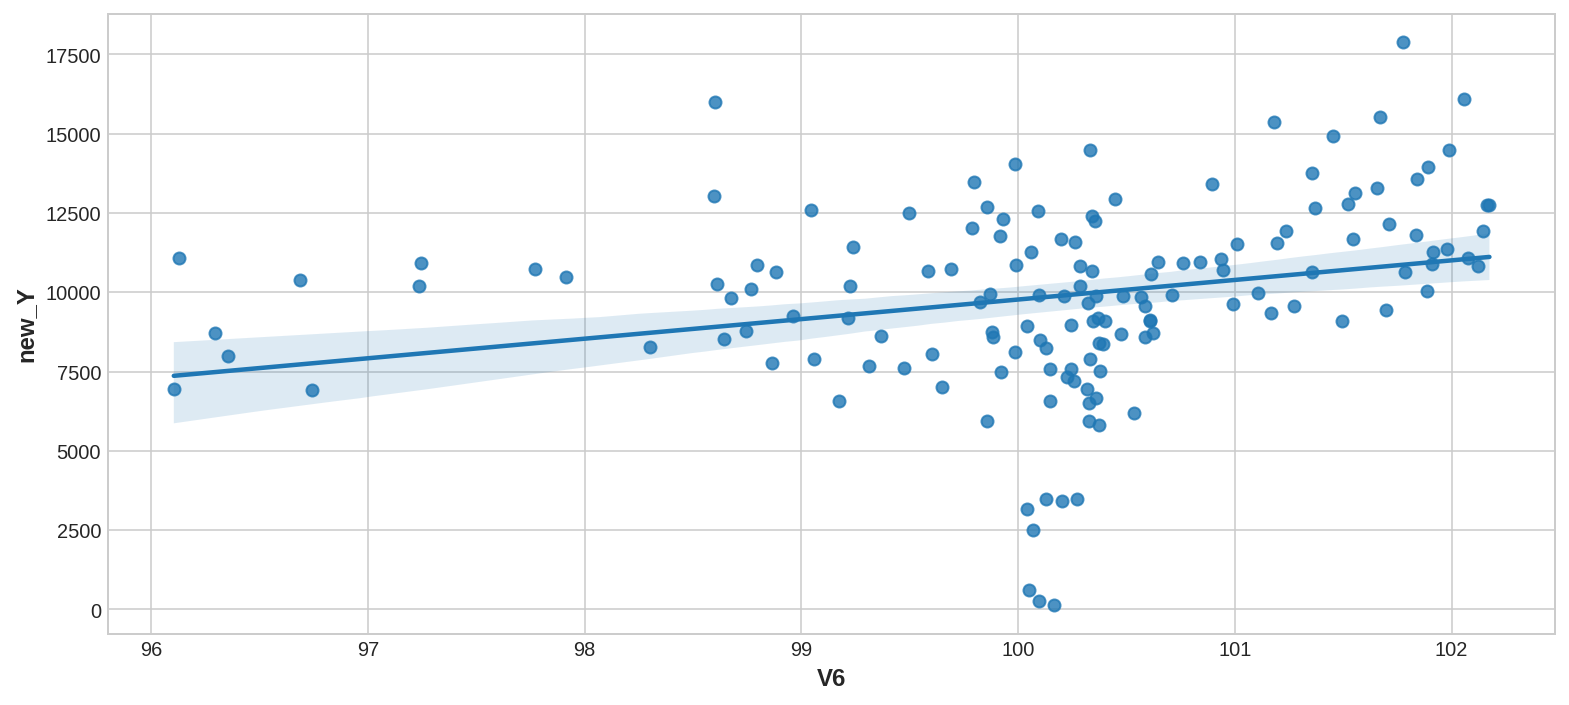

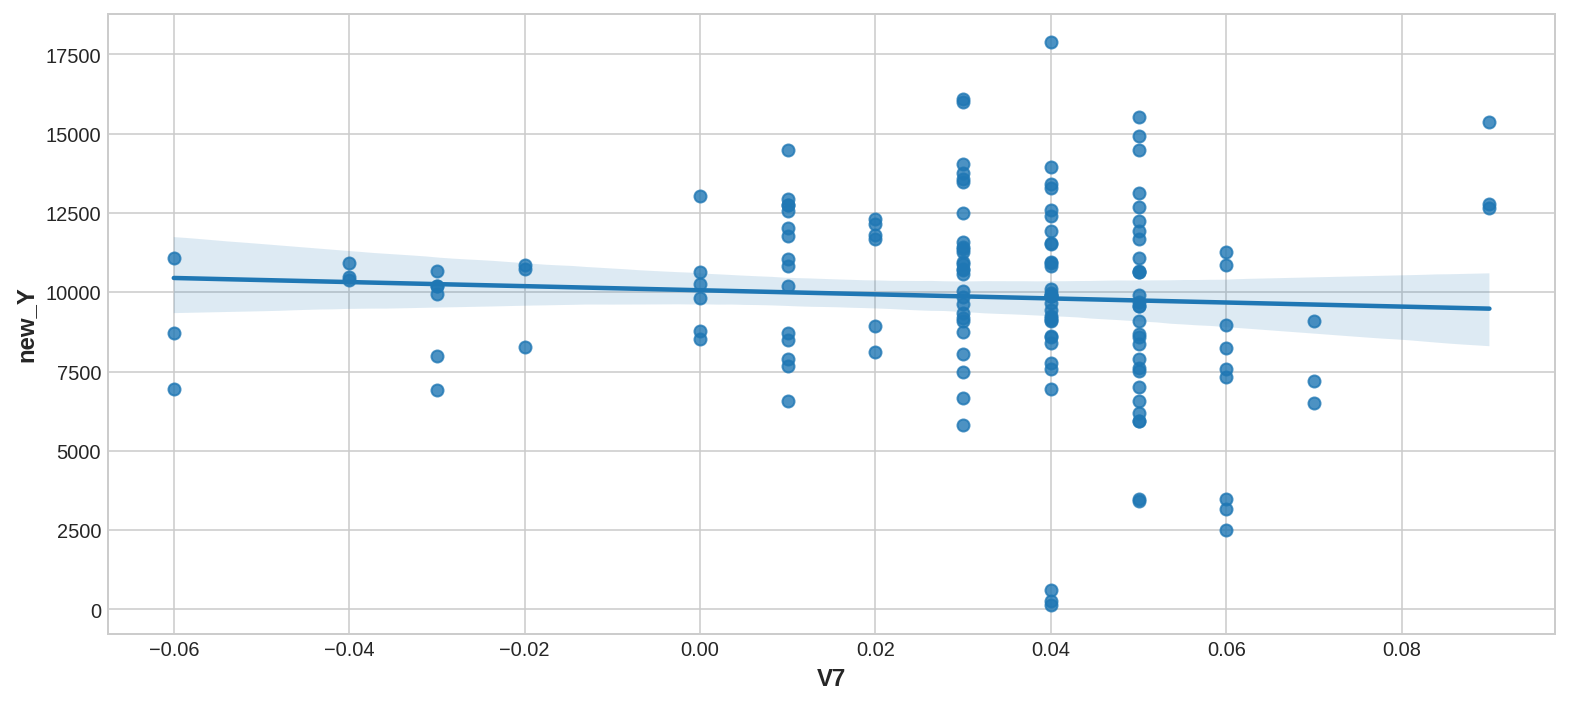

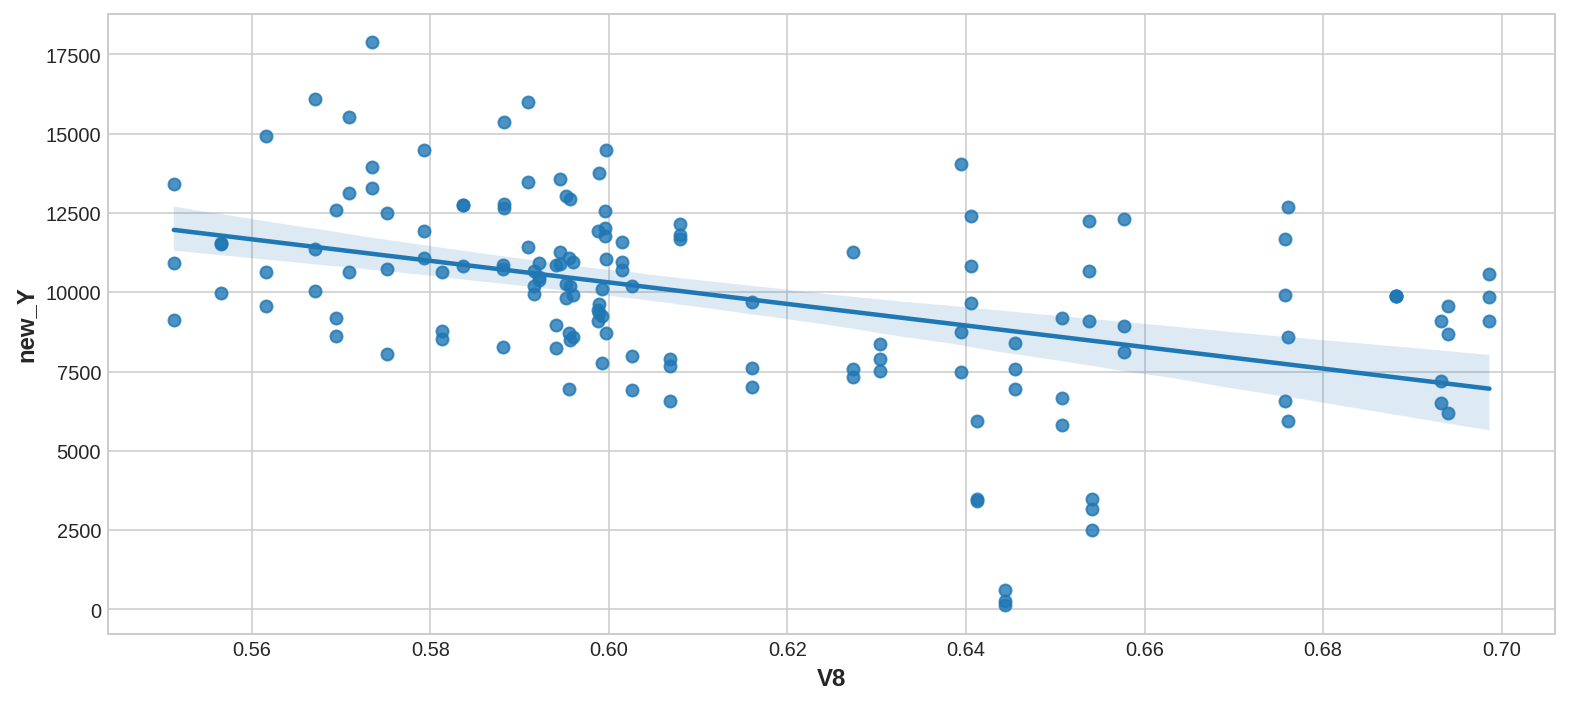

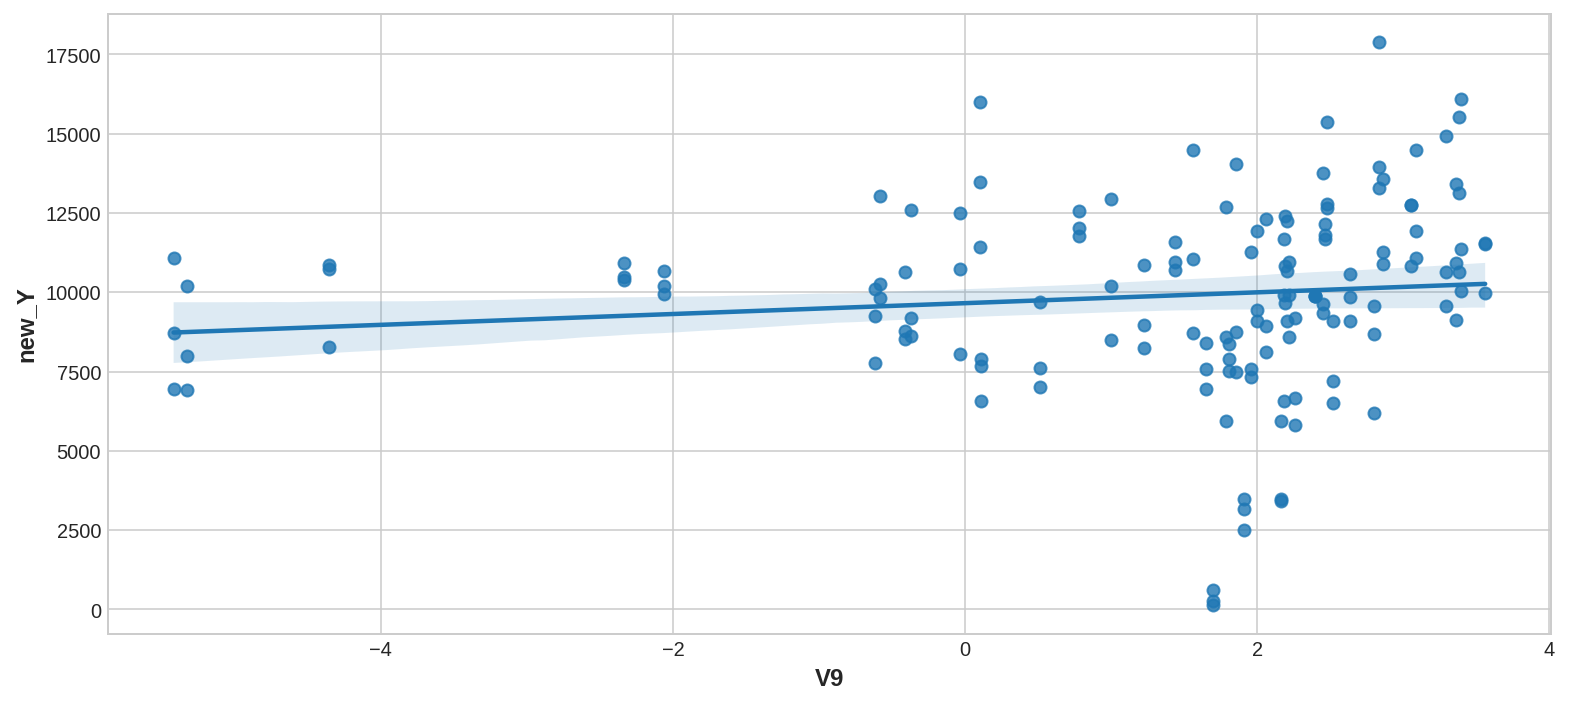

In [22]:
for e in range(1,10):
    fig, ax = plt.subplots() 
    sns.regplot(x="V"+str(e), y="new_Y", data=data, ax=ax)

# CLUSTERING OF DATA SET USING K-MEANS

In [23]:
#Let's take the best value of K
features = ['V'+str(i) for i in range(1,10)]
X1 = data[features].iloc[: , :].values
inertia = []
max_k = 30
for n in range(1 , max_k):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

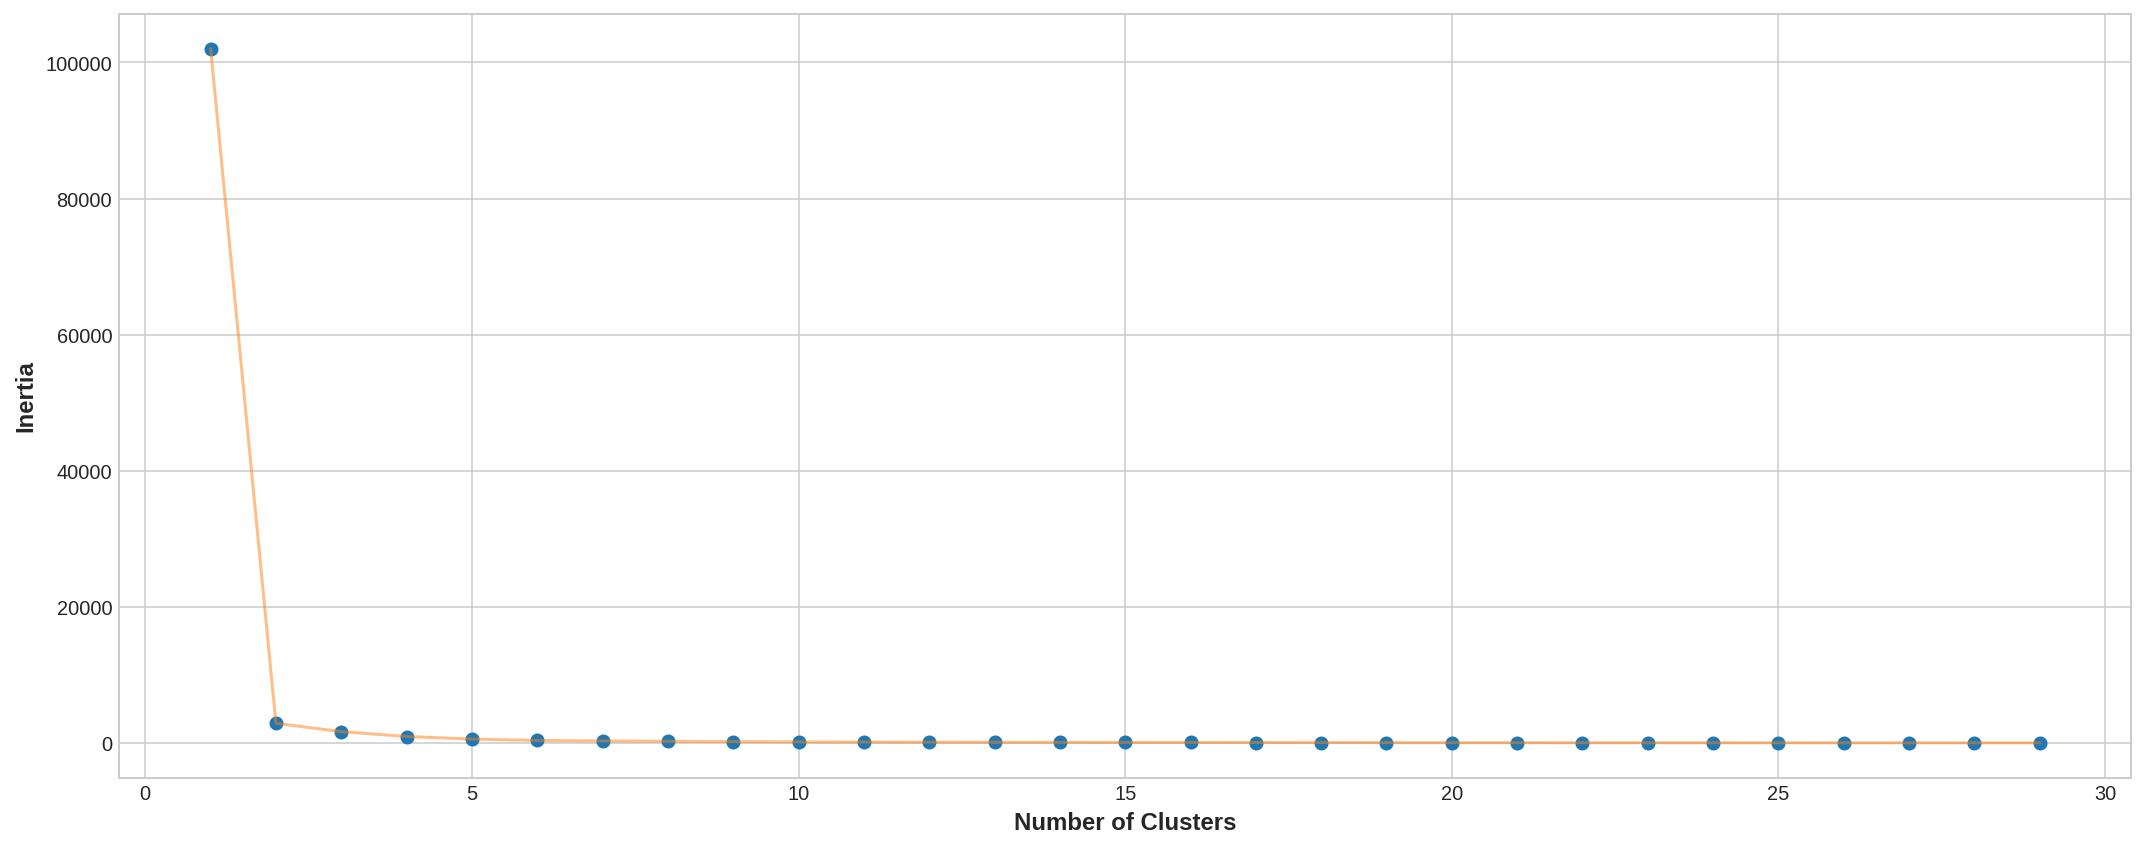

In [24]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , max_k) , inertia , 'o')
plt.plot(np.arange(1 , max_k) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [25]:
X = data[features]
kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Cluster
0,0.0,0.0,0.343088,0.0,100.4014,100.6104,0.04,0.551271,3.361059,1
1,0.0,0.0,0.343088,0.0,100.5697,100.7629,0.04,0.551271,3.361059,1
2,0.0,0.0,0.343088,0.0,100.7521,100.8958,0.04,0.551271,3.361059,1
3,0.0,0.0,0.357665,0.0,100.9278,101.0110,0.04,0.556536,3.559978,1
4,0.0,0.0,0.357665,0.0,101.0532,101.1080,0.04,0.556536,3.559978,1


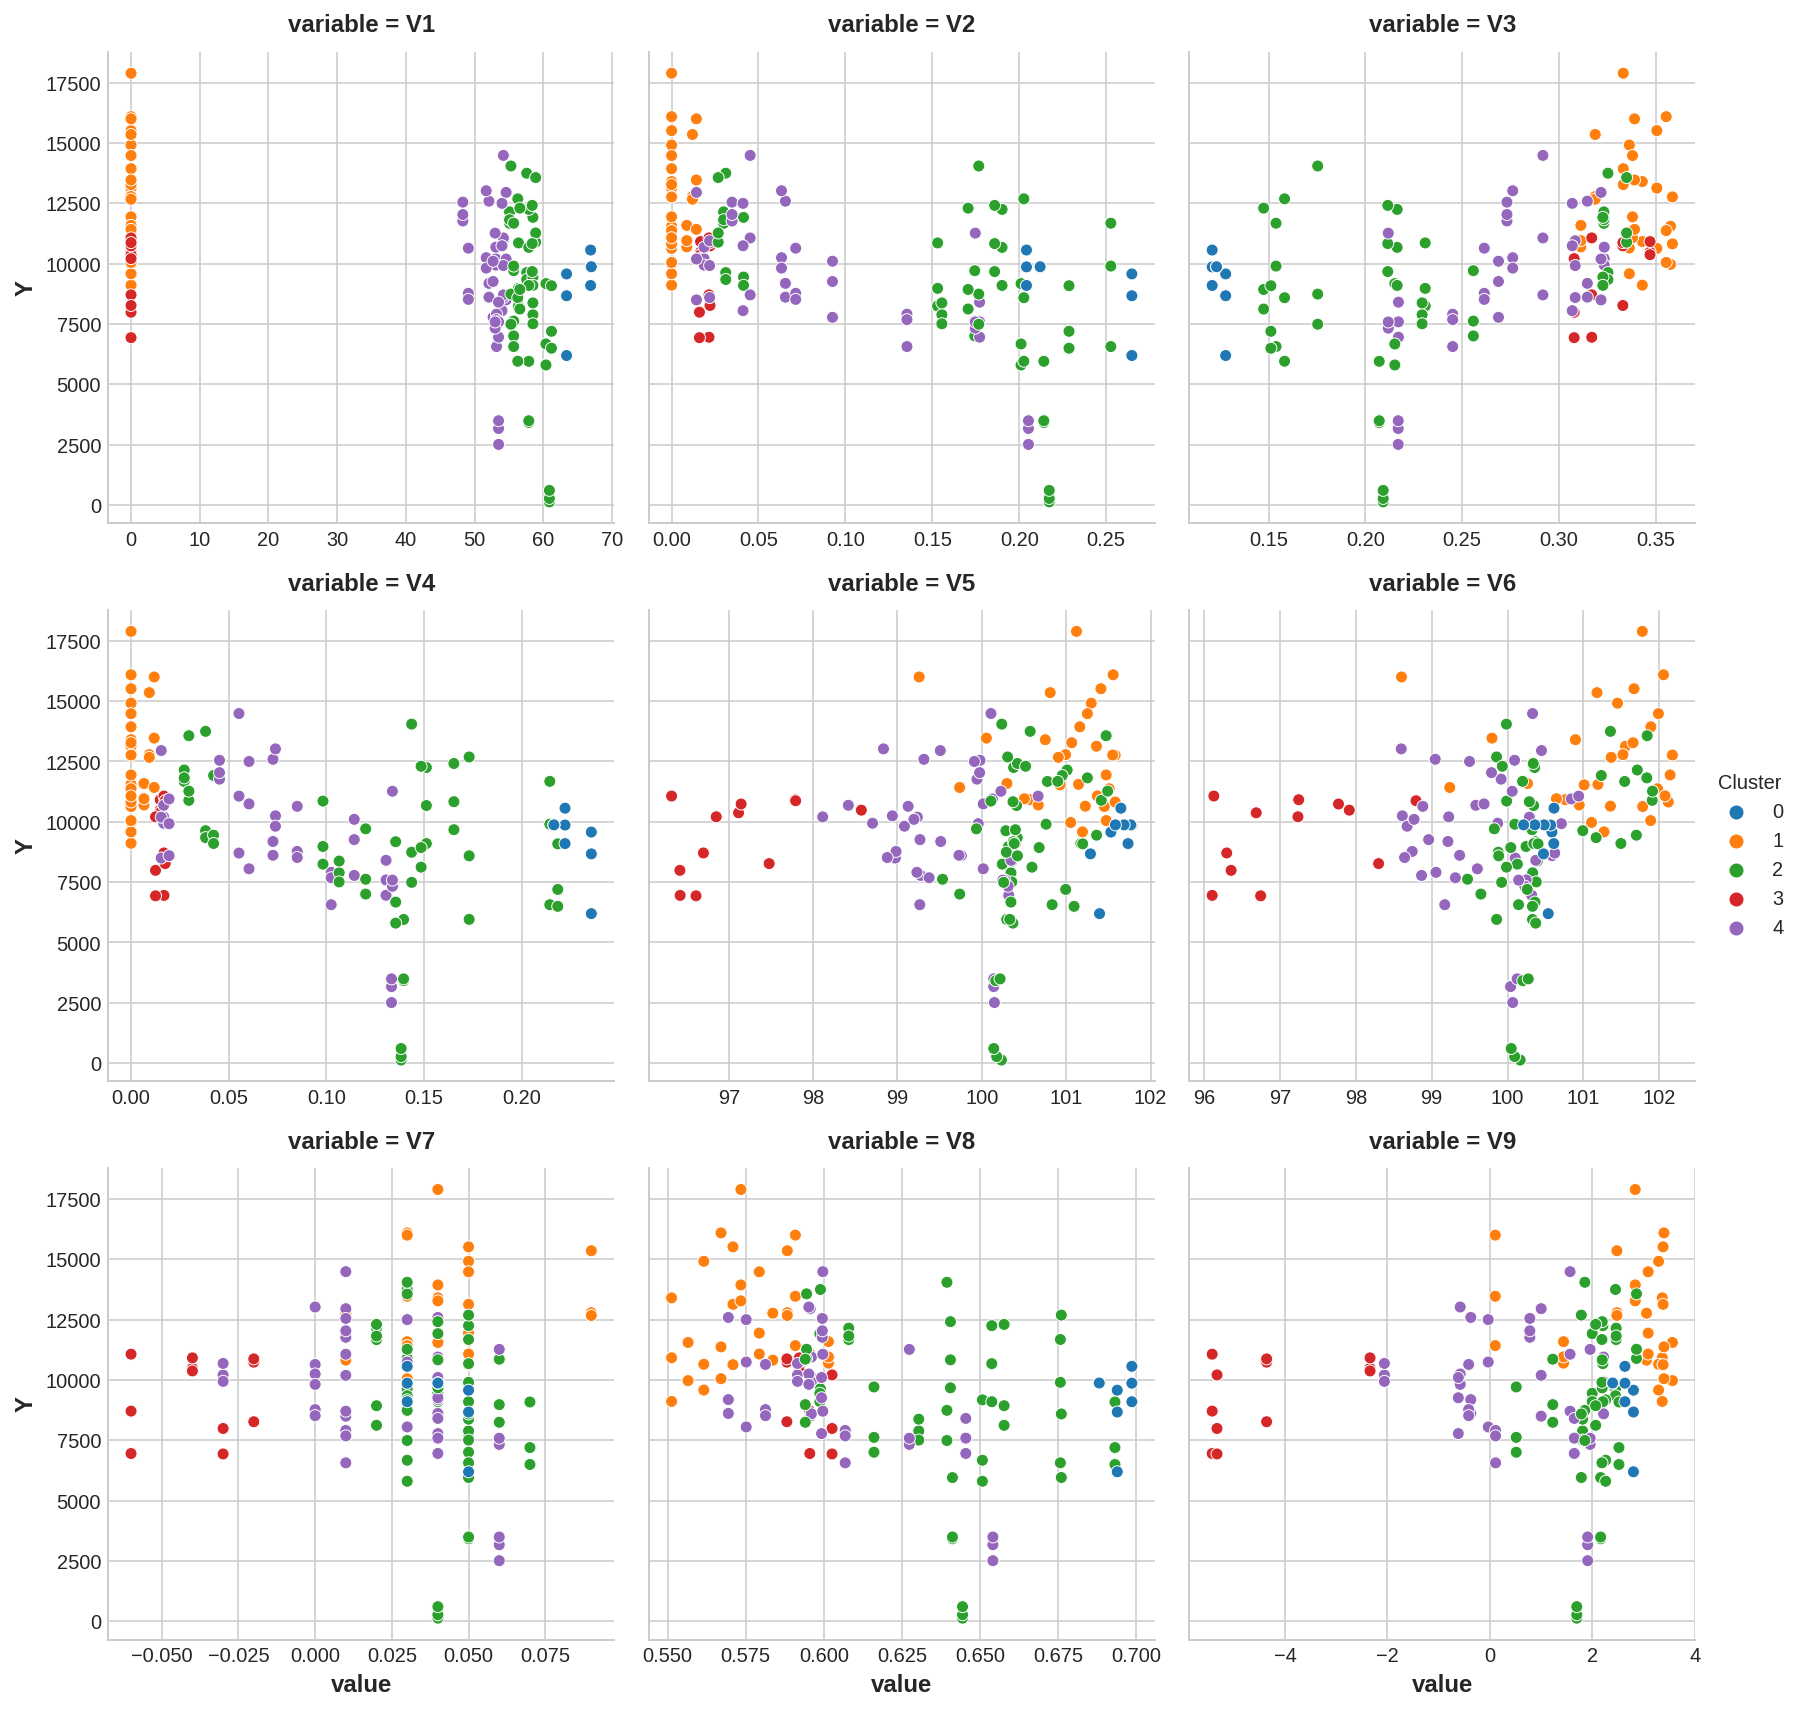

In [26]:
#Let's observe the clusters on different dimensions with target

Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["Y"] = data["new_Y"]
sns.relplot(
    x="value", y="Y", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["Y", "Cluster"],
    ),
);
    

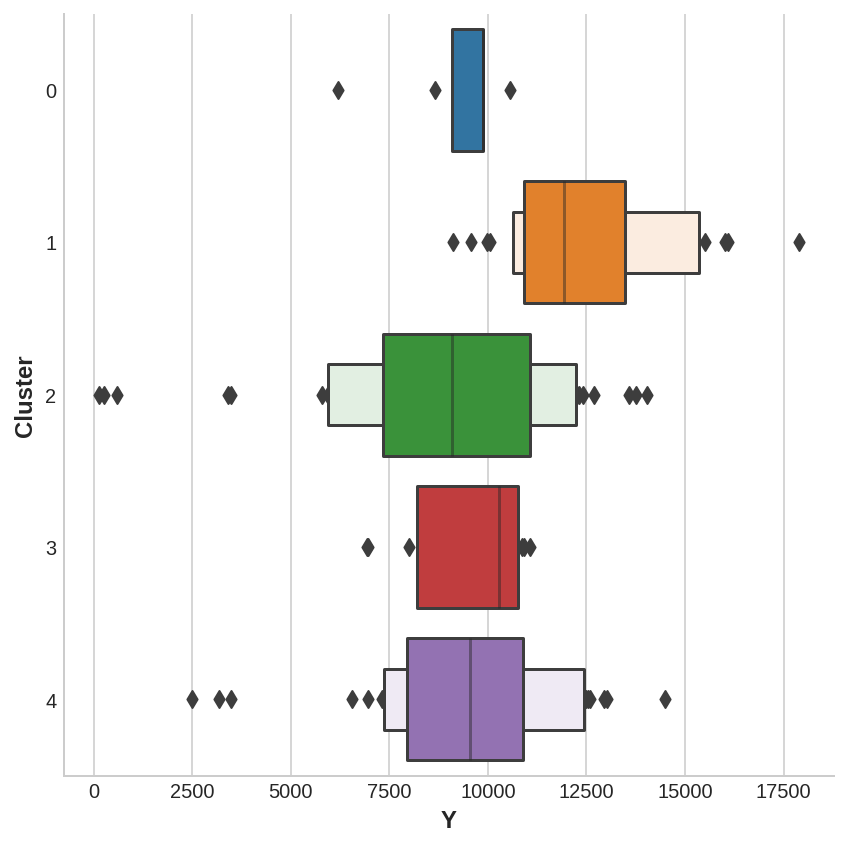

In [27]:
#Let's observe the distribution of the target in each cluster
X["Y"] = data["new_Y"]
sns.catplot(x="Y", y="Cluster", data=X, kind="boxen", height=6)

# PCA

In [28]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [29]:
X = data.copy()
y = X.pop('new_Y')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [30]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.990774,-2.098758,-0.593960,0.331242,0.684160,-0.210221,-0.335195,-0.019023,0.129436
1,1.938810,-2.223602,-0.571519,0.261743,0.665816,-0.165361,-0.253107,-0.031701,0.102710
2,1.885977,-2.345726,-0.552113,0.192690,0.654668,-0.111395,-0.174165,-0.034974,0.065028
3,1.842244,-2.517345,-0.525216,0.087755,0.552757,-0.159876,-0.152958,0.167939,0.046186
4,1.805314,-2.603597,-0.511019,0.039191,0.543573,-0.123705,-0.096942,0.163869,0.021795
...,...,...,...,...,...,...,...,...,...
142,-3.922590,0.677662,-0.113410,-1.295487,-0.008553,0.528889,-0.069315,0.046196,0.055148
143,-3.927758,0.677505,-0.119870,-1.298296,0.008746,0.554649,-0.072670,0.069451,0.025706
144,-3.874640,0.591306,-0.185160,-0.870061,0.047852,0.592143,0.039934,0.005217,-0.076972
145,-3.844768,0.670766,-0.203515,-0.827534,0.070398,0.579721,-0.014483,0.027890,-0.078416


In [31]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
V1,-0.332925,0.158100,0.885286,0.226008,-0.068383,0.063558,-0.096082,0.043310,-0.097628
V2,-0.411160,0.203765,-0.155181,0.110151,0.178273,-0.618585,0.444335,0.021704,-0.375339
V3,0.407521,-0.219233,0.162104,0.119197,-0.214609,-0.281179,0.227755,0.749973,0.076991
V4,-0.415188,0.211542,-0.098915,-0.009443,0.263122,0.240855,0.276958,0.321770,0.682283
V5,-0.255396,-0.450865,-0.005080,-0.287120,0.163685,0.503184,0.250549,0.263098,-0.486875
V6,-0.137695,-0.520906,0.194240,-0.247780,-0.345142,-0.211379,0.396134,-0.413733,0.344488
V7,-0.287013,-0.332460,-0.290251,0.779756,-0.293469,0.142221,-0.091932,-0.005145,-0.000150
V8,-0.392179,0.210357,-0.183186,-0.396038,-0.664682,-0.062216,-0.306157,0.262443,-0.057107
V9,-0.247561,-0.459640,0.023827,-0.117435,0.417626,-0.392768,-0.585556,0.149531,0.138462


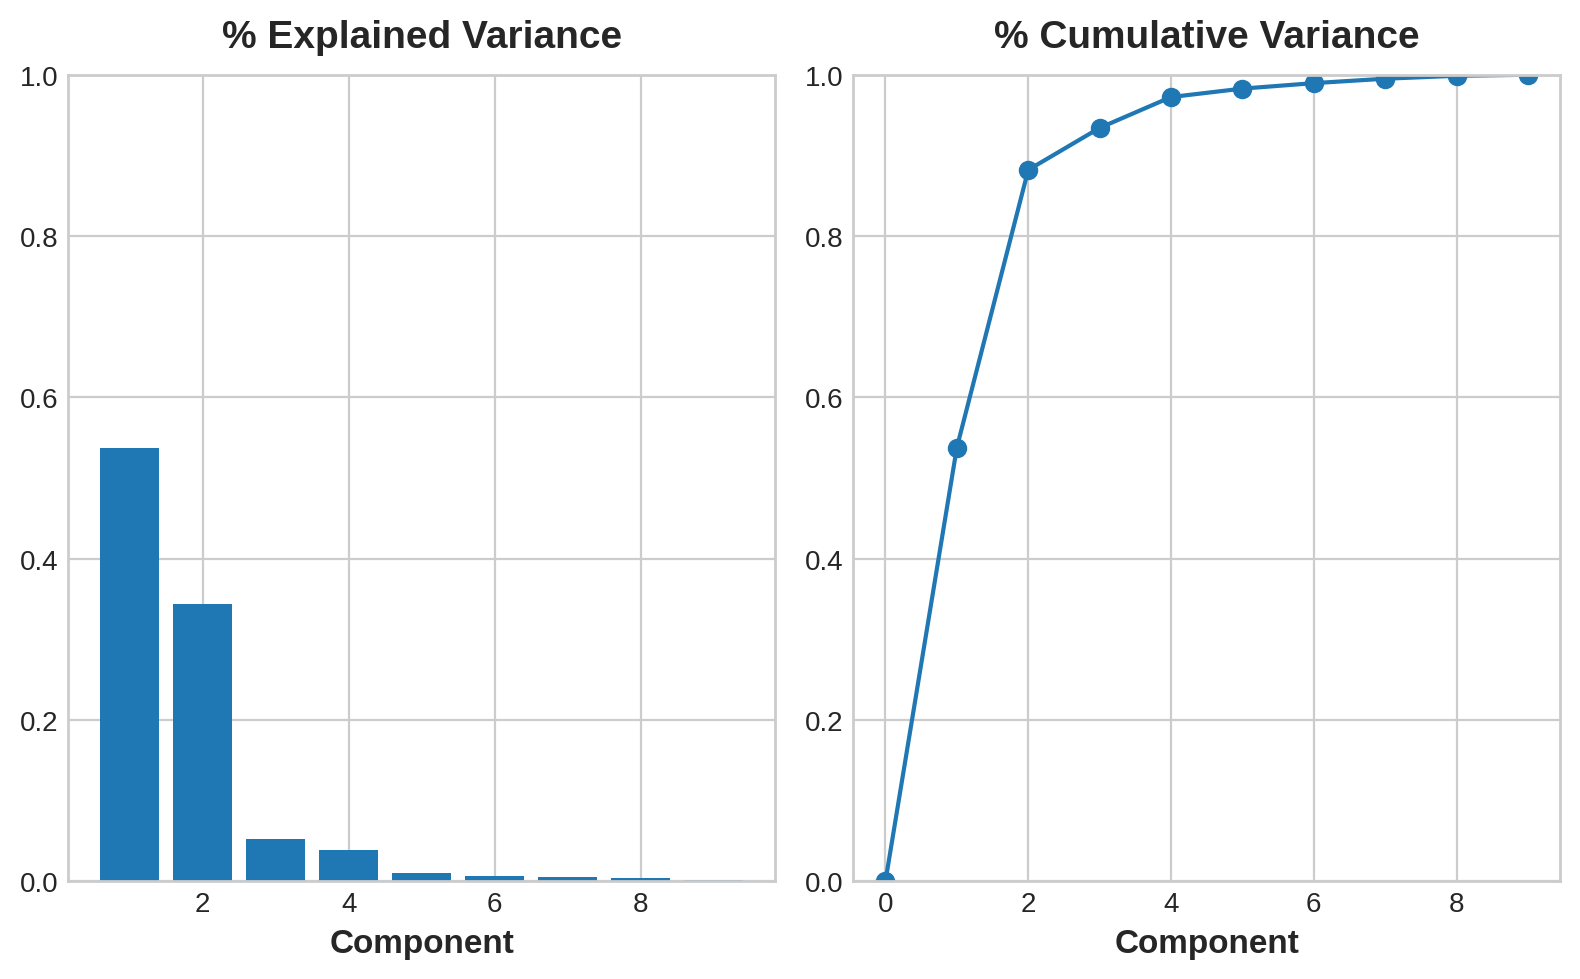

In [32]:
# Look at explained variance
plot_variance(pca);

In [75]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    0.334910
PC2    0.318222
PC6    0.289280
PC9    0.179434
PC3    0.127079
PC4    0.051183
PC8    0.031745
PC5    0.000000
PC7    0.000000
Name: MI Scores, dtype: float64

In [33]:
#Let make predictions on with the dataset

features = ["V"+str(i) for i in range(1,10)]
X = data[features]
y = data["new_Y"]

baseline = RandomForestRegressor(criterion="mae", random_state=11)
baseline_score = cross_val_score(
    baseline, X, y, cv=6, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.5}")

MAE Baseline Score: 2408.8


In [34]:

model = baseline.fit(X, y)
predictions = model.predict(X)


In [35]:
mae = mean_absolute_error(y, predictions)
print(f"MAE {mae}")

MAE 640.2572505668932


In [36]:
data["predictions"] = predictions
data[["predictions", "new_Y"]]

,predictions,new_Y
0,9818.380000,9111.000000
1,10942.370000,10918.000000
2,12103.440000,13402.000000
3,11285.830000,11530.000000
4,10624.030000,9972.000000
...,...,...
142,9464.000833,9097.000000
143,9702.963889,9866.000000
144,9775.508611,9872.597222
145,9777.916528,9872.597222


In [37]:
predictions = pd.DataFrame(predictions, columns=["predictions"])
predictions.to_excel("predictions.xlsx")